## Credit Card Fraud Detection
## Problem Statement: 
Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day.
Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.    
**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.**


###  Import the required libraries

In [1]:
#import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as plticker
import seaborn as sns

#set to display all rows and columns in a dataframe

pd.set_option('display.max_columns', 500)
sns.set(style='darkgrid')


from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score, f1_score,recall_score,accuracy_score,roc_auc_score,roc_curve,precision_recall_curve,average_precision_score,classification_report

from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Read and Inspect Data

In [2]:
#importing data
#from google.colab import drive
#drive.mount('/content/gdrive')
#df=pd.read_csv('/content/gdrive/My Drive/creditcard.csv')


df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [3]:
#Check the number of columns and rows
df.shape

(284807, 31)

In [4]:
#observe the different feature type present in the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### All the features are PCA tranformed except Time and Amount

In [5]:
#Statistics of the dataset
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.768627e-15  9.170318e-16 -1.810658e-15  1.693438e-15  1.479045e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.482336e-15  1.392007e-15 -7.528491e-16  4.328772e-16  9.049732e-16   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   5.085503e-16  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

In [6]:
#Check for Null values

df_null = df.isnull().mean()*100
df_null.sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

**As we can observe , there are no null values present in the dataset**

In [7]:
#Distribution of classes
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('normal:',normal_share)
print('fraudulent:',fraud_share)

normal: 99.82725143693798
fraudulent: 0.1727485630620034


### Exploratory Data Analysis

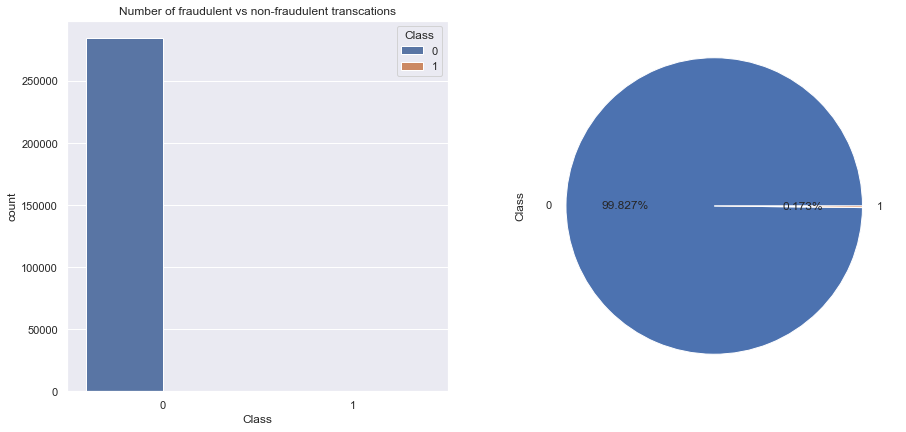

In [8]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations

fig=plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='Class',hue='Class',data=df)
plt.title("Number of fraudulent vs non-fraudulent transcations")
plt.subplot(222)

# Pie plot for percentage of fraudulent vs non-fraudulent transcations

df["Class"].value_counts().plot.pie(autopct = "%1.3f%%")
plt.show()

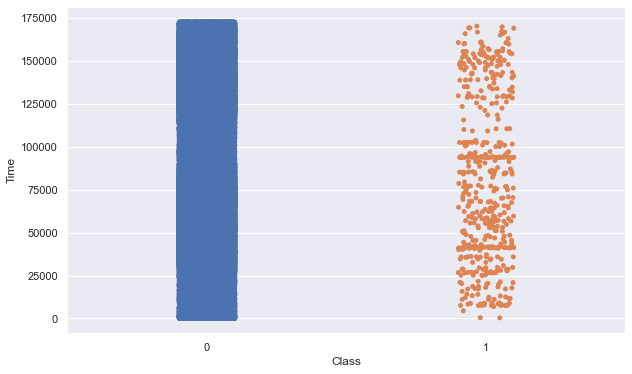

In [9]:
# Scatter plot to observe the distribution of classes with time
fig = plt.figure(figsize=(10,6))
sns.stripplot(y='Time',x='Class',data=df,jitter=True)
plt.show()

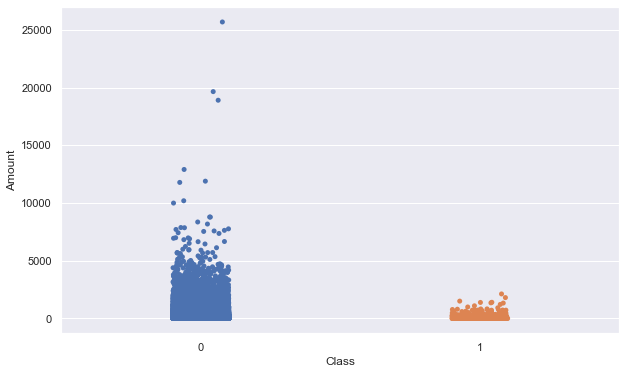

In [10]:
# Scatter plot to observe the distribution of classes with Amount
fig = plt.figure(figsize=(10,6))
sns.stripplot(y='Amount',x='Class',data=df,jitter=True)
plt.show()

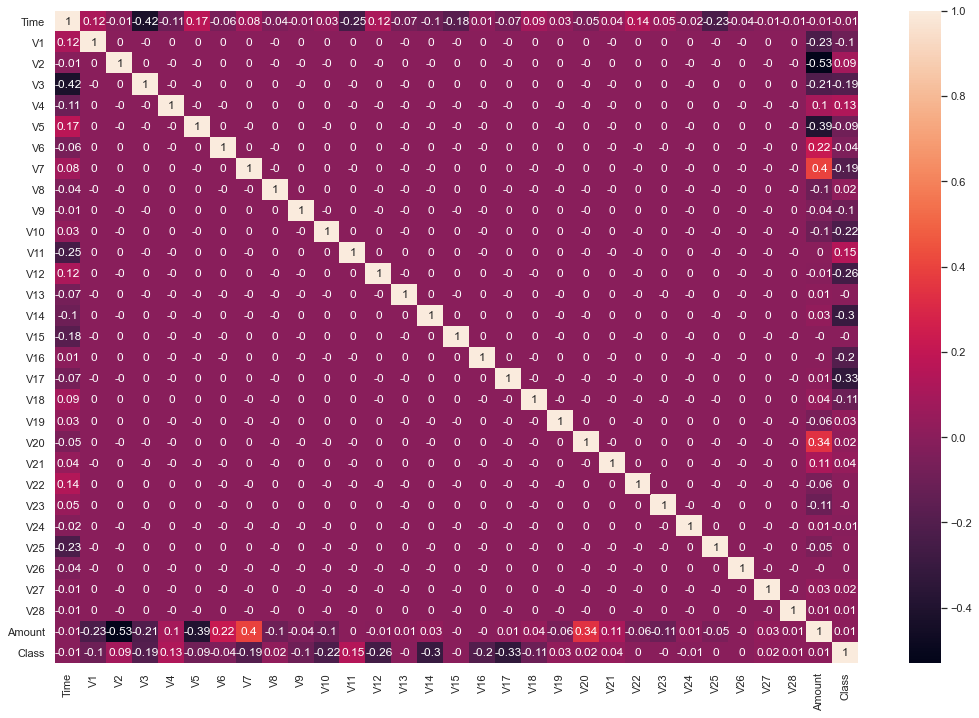

In [11]:
#plot correlation between different variables
fig=plt.figure(figsize=(18,12))
sns.heatmap(round(df.corr(),2), annot =True)

All the PCA tranformed variables have no correlation with other variables , but time and amount show correlation 

In [12]:
# Drop Time column as it does not add value and cannot give any meaningful information
df.drop(['Time'],axis=1,inplace=True)

### Splitting the data into train & test data

In [13]:
X = df.drop(['Class'],axis = 1)
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  
0  149.62  
1    2.69  
2  378.66  
3  123.50  
4   69.99

In [14]:
var = X.columns

In [15]:
y = df['Class']

In [16]:
#Stratified test-train split
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,stratify=y,train_size=0.75,random_state=100)

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


#### Plotting the distribution of  variable to check skewness

In [18]:
fraud = df.Class == 1
normal = df.Class == 0

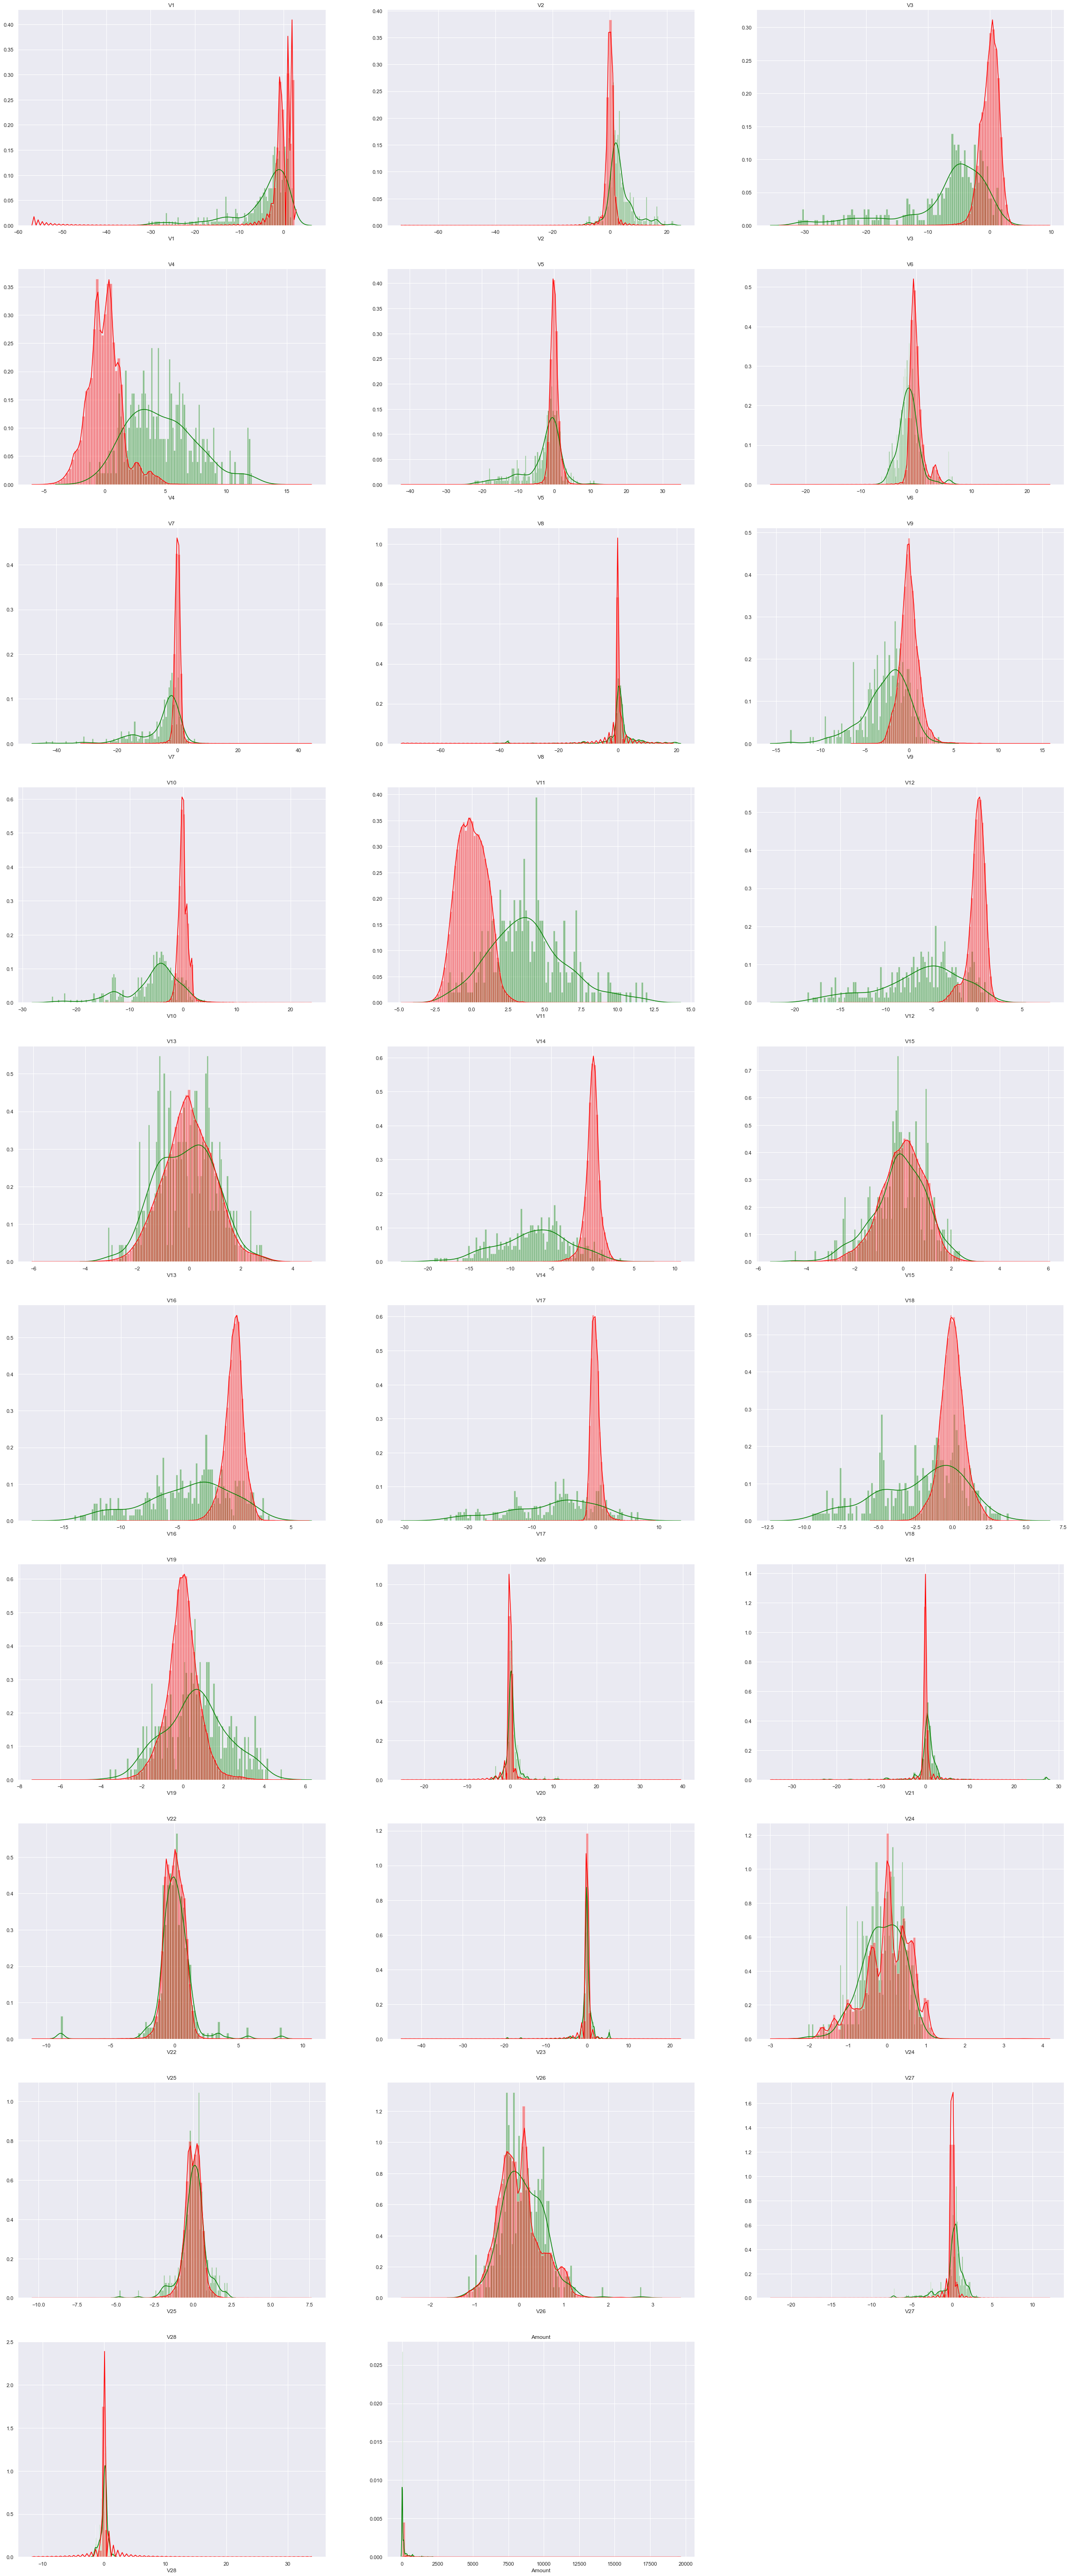

In [19]:
# plot the histogram of a variable from the dataset to see the skewness

plt.figure(figsize=(40,100))
for i in range(len(var)):
    plt.subplot(10,3,i+1)
    sns.distplot(X_train[var[i]][fraud],bins=100,color='green')
    sns.distplot(X_train[var[i]][normal],bins=100,color='red')
    plt.title(var[i])
plt.show()

**We can observe skewness in data hence we will do power transform to mitigate it**

In [20]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer
pt = preprocessing.PowerTransformer(copy=False)
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


In [21]:
# power transform dataframe
X_train_pwtr = pd.DataFrame(data=X_train_pt,   columns=var)
X_test_pwtr = pd.DataFrame(data=X_test_pt,   columns=var)

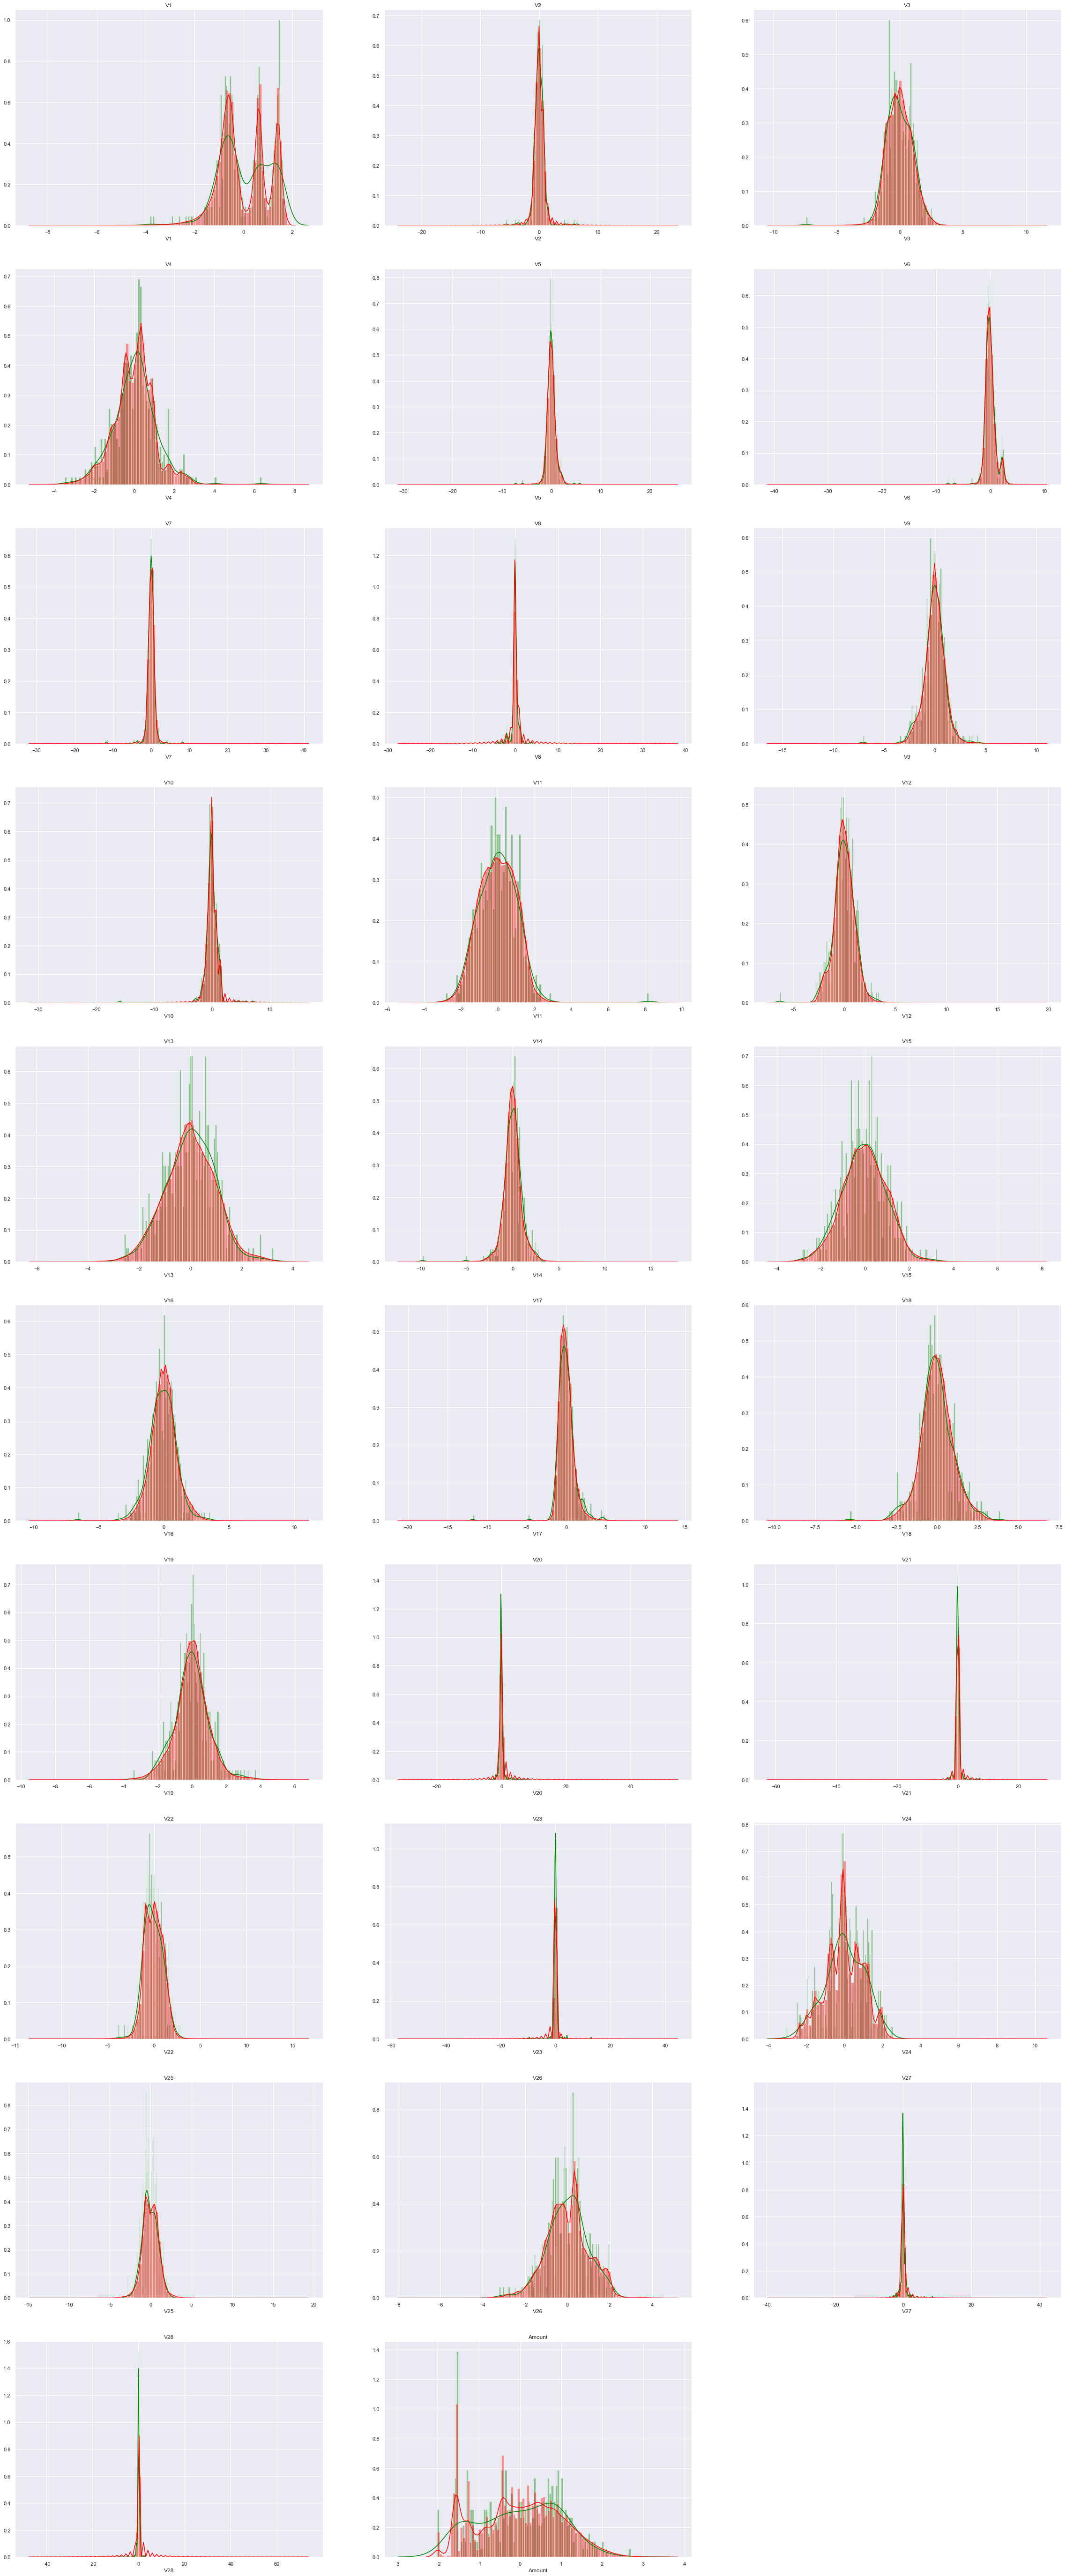

In [22]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(40,100))
for i in range(len(var)):
    plt.subplot(10,3,i+1)
    sns.distplot(X_train_pwtr[var[i]][fraud],bins=100,color='green')
    sns.distplot(X_train_pwtr[var[i]][normal],bins=100,color='red')
    plt.title(var[i])
plt.show()

### Model Building on imbalanced data
<b> 
    1. Logistic regression
    2. Decision Tree
    3. XGboost
    4. Random forest
    5. KNN
<b>

In [23]:
#check
X_train_pwtr.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.410410 -0.147528 -0.841174  0.396367 -0.124241 -1.010984  0.170590   
1 -0.677525 -0.339435 -1.142599 -0.390072  0.198429 -0.313779  2.963931   
2 -0.835692  0.761475  1.177396  0.076002 -0.005779 -0.560710  0.604764   
3  1.207858 -0.528473 -0.350417  0.394845 -0.657817 -0.118650 -0.567704   
4 -1.025098 -3.643983 -1.618210  0.532563 -2.213816  0.296549  1.280535   

         V8        V9       V10       V11       V12       V13       V14  \
0 -0.368933  0.780021 -0.042677 -0.813843  0.131942 -0.530559  0.441788   
1 -0.640268 -1.269840 -0.676379  0.379486  0.187639 -0.021491  1.047495   
2 -0.165182 -0.176322  0.256200  0.630391  1.124264  1.362390 -0.387572   
3  0.027697  0.966232  0.197215  0.740528  0.811786 -0.578376  0.040572   
4 -0.551575 -0.036066 -0.119871 -0.752716 -0.880632  0.077701  0.073038   

        V15       V16       V17       V18       V19       V20       V21  \
0  0.201919 -0.446304 -0.356143 -0.720688  0.225619 -0.344945 -0.334105   
1 -1.484327 -0.562105 -0.767834  0.230722  0.342322  1.243356  0.972659   
2  1.082005 -0.503703 -0.115408 -1.399937 -0.682783  0.274999 -0.332628   
3 -0.351535  0.431830 -0.725558  0.543699 -0.111794 -0.146964  0.405944   
4  1.024194  2.353337  0.017277 -0.961335 -0.151533  5.381592  1.631087   

        V22       V23       V24       V25       V26       V27       V28  \
0 -0.864704  0.464383 -0.099398 -0.306384 -1.306578 -0.064078 -0.138665   
1  1.825313  1.148596 -0.634403  0.259975  1.657002 -0.273591  0.632868   
2 -0.340779  0.261243  1.074809 -0.503019  0.111638 -0.379645 -1.129693   
3  1.203656  0.137610  0.023011 -0.644226  1.204633 -0.120571 -0.143325   
4 -1.419809 -2.120378  1.433526 -2.221633 -1.559876 -0.941893  0.978258   

     Amount  
0 -0.126381  
1  1.766553  
2 -0.326470  
3  0.691379  
4  2.483170

In [24]:
#create empty dataframe to store model evaluation params
result_df = pd.DataFrame(columns = ['Model', 'AUC_ROC', 'F1','Recall','Precision','Threshold'])
result_df_bal = pd.DataFrame(columns = ['Model', 'AUC_ROC', 'F1','Recall','Precision','Threshold'])

In [25]:
# function to draw ROC Curve,confusion matrix and calculate optimal threshold using ROC curve

def roc_confusion_matrix2(result_df_bal,y_actual,y_pred_proba,flagtrain=True,opt_threshold=0.5,model='Default'):
    # ROC Curve
    plt.figure(figsize=(20, 5))
    fpr, tpr, thresholds = metrics.roc_curve( y_actual, y_pred_proba,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( y_actual, y_pred_proba )

    plt.subplot(1,3,1)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")


    #optimal threshold using ROC curve
    if flagtrain:
        opt_threshold = thresholds[np.argmax(tpr-fpr)]

    
    #confusion Matrix
    y_pred = (y_pred_proba>opt_threshold).astype('int16')
    cm = metrics.confusion_matrix(y_actual, y_pred)
    cm = pd.DataFrame(cm, ['True Normal','True Fraud'],['Predicted Normal','Predicted Fraud'])

    plt.subplot(1,3,2)
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True,annot_kws={"size": 16},fmt='g')
    plt.subplots_adjust(wspace = 0.35)
    plt.show()

    # Evaluation Metrics
    f1_scr = round(f1_score(y_actual, y_pred),3)
    precision_scr = round(precision_score(y_actual, y_pred),3)
    recall_scr = round(recall_score(y_actual, y_pred),3)
    auc_scr = round(auc_score,3)
    opt_threshold = round(opt_threshold,3)
    
    print('AUC_ROC:' , auc_scr )
    print("F1 score : ",f1_scr)
    print("Precision : ",precision_scr)
    print("Recall : ",recall_scr)
    print('Optimal threshold is', opt_threshold)
    
    if flagtrain:
        return(opt_threshold)
    else:   
        result_df_bal = result_df_bal.append({'Model':model,'AUC_ROC':auc_scr,'F1':f1_scr,'Recall':recall_scr,'Precision':precision_scr,'Threshold':opt_threshold},ignore_index = True)
        return(result_df_bal)

In [26]:
# function to draw ROC Curve,confusion matrix and calculate optimal threshold using precision-recall graph

def roc_confusion_matrix(result_df,y_actual,y_pred_proba,flagtrain=True,opt_threshold=0.5,model='Default'):
    # ROC Curve
    plt.figure(figsize=(20, 5))
    fpr, tpr, thresholds = metrics.roc_curve( y_actual, y_pred_proba,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( y_actual, y_pred_proba )

    plt.subplot(1,3,1)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")


    if flagtrain:

        p, r, thresholds = precision_recall_curve(y_actual, y_pred_proba)
        #optimal threshold using precision recall
        pr_df = pd.DataFrame(data = [p[:-1],r[:-1], thresholds]).T
        pr_df.columns = ['precision','recall','threshold']
        pr_df['abs_diff_pr_re'] =abs(pr_df['precision']-pr_df['recall'])
        
        opt_threshold = pr_df.loc[pr_df['abs_diff_pr_re'] == pr_df['abs_diff_pr_re'].min()]['threshold'].tolist()[0]
        plt.subplot(1,3,2)
        plt.plot(thresholds, p[:-1], "g-")
        plt.plot(thresholds, r[:-1], "r-")
        plt.axvline(x=opt_threshold, color='b',linestyle='--')

    
    #confusion Matrix
    y_pred = (y_pred_proba>opt_threshold).astype('int16')
    cm = metrics.confusion_matrix(y_actual, y_pred)
    cm = pd.DataFrame(cm, ['True Normal','True Fraud'],['Predicted Normal','Predicted Fraud'])
    if flagtrain:
        plt.subplot(1,3,3)
    else:
        plt.subplot(1,3,2)
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True,annot_kws={"size": 16},fmt='g')
    
    plt.subplots_adjust(wspace = 0.35)
    plt.show()
    # Evaluation Metrics
    f1_scr = round(f1_score(y_actual, y_pred),3)
    precision_scr = round(precision_score(y_actual, y_pred),3)
    recall_scr = round(recall_score(y_actual, y_pred),3)
    auc_scr = round(auc_score,3)
    opt_threshold = round(opt_threshold,3)
    
    print('AUC_ROC:' , auc_scr )
    print("F1 score : ",f1_scr)
    print("Precision : ",precision_scr)
    print("Recall : ",recall_scr)
    print('Optimal threshold is', opt_threshold)
    
    if flagtrain:
        return(opt_threshold)
    else:   
        result_df = result_df.append({'Model':model,'AUC_ROC':auc_scr,'F1':f1_scr,'Recall':recall_scr,'Precision':precision_scr,'Threshold':opt_threshold},ignore_index = True)
        return(result_df)

<b> 1. Logistic Regression <b>

In [27]:
# Logistic Regression with default parameters.
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to train data
logreg = LogisticRegression()
logreg.fit(X_train_pwtr, y_train)


LogisticRegression()

In [28]:
# Predict on train data
y_train_pred = logreg.predict(X_train_pwtr)

# Evaluation Metrics
print("Precision on train: ",precision_score(y_train, y_train_pred))
print("Recall on train: ",recall_score(y_train, y_train_pred))
print("F1 score on train: ",f1_score(y_train, y_train_pred))

Precision on train:  0.8802816901408451
Recall on train:  0.6775067750677507
F1 score on train:  0.7656967840735069


In [29]:
#Logistic Regression on Imbalanced Data with StratifiedK-Fold and Hypertuning

logreg_tuned = LogisticRegression(random_state=42)

folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

params = {'C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'penalty':['l1','l2'],
         'solver' : ['liblinear']}

from sklearn.model_selection import GridSearchCV
logreg_cv = GridSearchCV(estimator = logreg_tuned , cv = folds.split(X_train_pwtr,y_train), param_grid = params, scoring  = 'roc_auc')

In [30]:
logreg_cv.fit(X_train_pwtr, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000185E2E0C580>,
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 1, 2],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [31]:
print(logreg_cv.best_score_)
print(logreg_cv.best_params_)

0.9818059892381911
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [32]:
# assign best estimators
logreg_tuned.set_params(**logreg_cv.best_estimator_.get_params())

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [33]:
# predict fraud on train data based on best estimators and values
logreg_tuned.fit(X_train_pwtr, y_train)
y_train_pred_proba_lr = logreg_tuned.predict_proba(X_train_pwtr)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_lr = logreg_tuned.predict_proba(X_test_pwtr)[:,1]

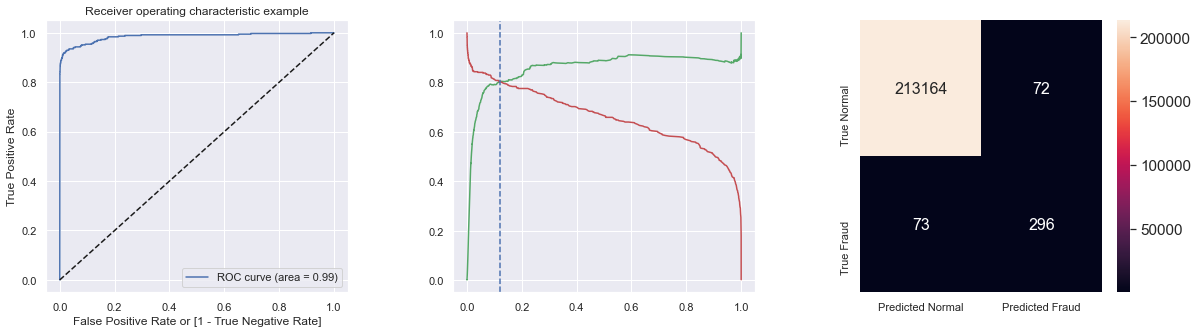

AUC_ROC: 0.985
F1 score :  0.803
Precision :  0.804
Recall :  0.802
Optimal threshold is 0.12


In [34]:
# Roc for train
logreg_threshold = roc_confusion_matrix(result_df,y_train,y_train_pred_proba_lr,flagtrain=True,model='LogisticReg_Imbalanced')

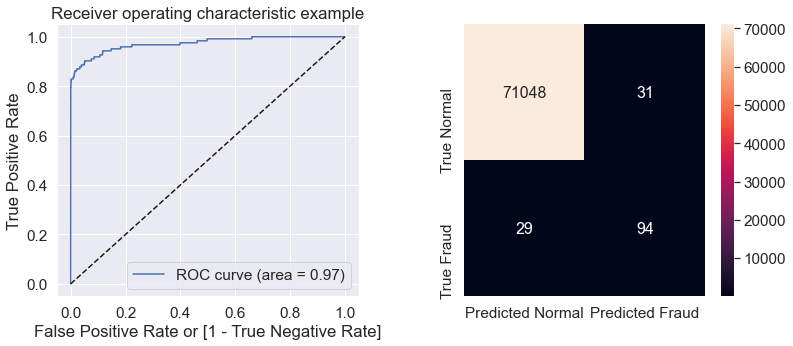

AUC_ROC: 0.973
F1 score :  0.758
Precision :  0.752
Recall :  0.764
Optimal threshold is 0.12


In [35]:
# ROC for test with optimal threshold

result_df = roc_confusion_matrix(result_df,y_test,y_test_pred_proba_lr,flagtrain=False,opt_threshold = logreg_threshold,model='LogisticReg_Imbalanced')

<b> 2. Decision Tree <b>

In [36]:
#Decision Tree with default parameters.
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(X_train_pwtr, y_train)

#predict on train data
y_pred = dt.predict(X_train_pwtr)

#Evaluation metrics
print("Accuracy: {0}".format(metrics.accuracy_score(y_train, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_train, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_train, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_train, y_pred)))

Accuracy: 0.9996207953933662
Recall/Sensitivity: 0.8265582655826558
Precision: 0.9472049689440993
Roc_Auc_score: 0.9132392708543191


In [37]:
#hyperparameter tuning decision tree on imbalanced data
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
# Create the parameter grid 
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}



# Instantiate the grid search model
dt_tuned = DecisionTreeClassifier(random_state=42)
dt_cv = GridSearchCV(estimator = dt_tuned, param_grid = params, 
                          cv = folds, scoring  = 'roc_auc',n_jobs=-1,verbose=1)

# Fit the grid search to the data
dt_cv.fit(X_train_pwtr,y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [38]:
# Best hyperparameters
print(dt_cv.best_score_)
print(dt_cv.best_params_)

0.9658637348157336
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [39]:
# assign best estimators
dt_tuned.set_params(**dt_cv.best_estimator_.get_params())

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       min_samples_split=50, random_state=42)

In [40]:
# Fit DT with best hyperparameters
dt_tuned.fit(X_train_pwtr,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       min_samples_split=50, random_state=42)

In [41]:
# predict fraud on train data based on best estimators and values
#y_train_pred_dt = dt_tuned.predict(X_train_pwtr)
y_train_pred_proba_dt = dt_tuned.predict_proba(X_train_pwtr)[:,1]

# predict fraud on test data based on best estimators and values
#y_test_pred_dt = dt_tuned.predict(X_test_pwtr)
y_test_pred_proba_dt = dt_tuned.predict_proba(X_test_pwtr)[:,1]

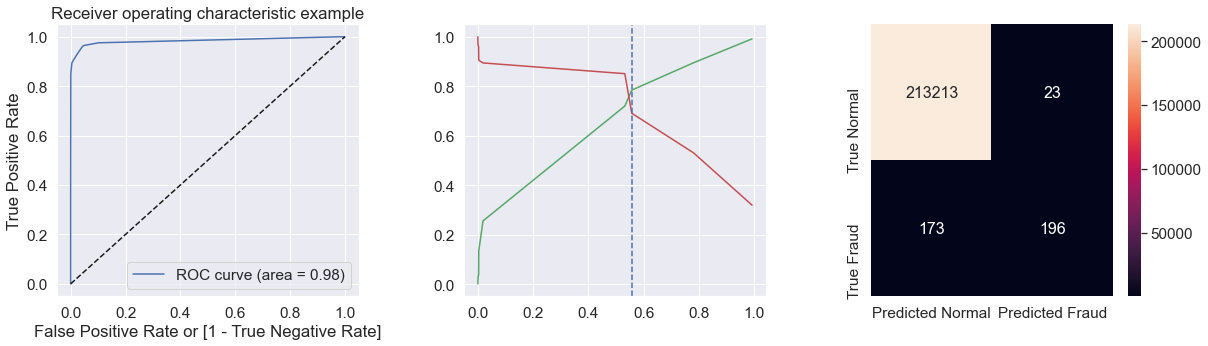

AUC_ROC: 0.984
F1 score :  0.667
Precision :  0.895
Recall :  0.531
Optimal threshold is 0.557


In [42]:
#Roc for train data
dt_threshold = roc_confusion_matrix(result_df,y_train,y_train_pred_proba_dt,flagtrain=True,model='DecisionTree_Imbalanced')

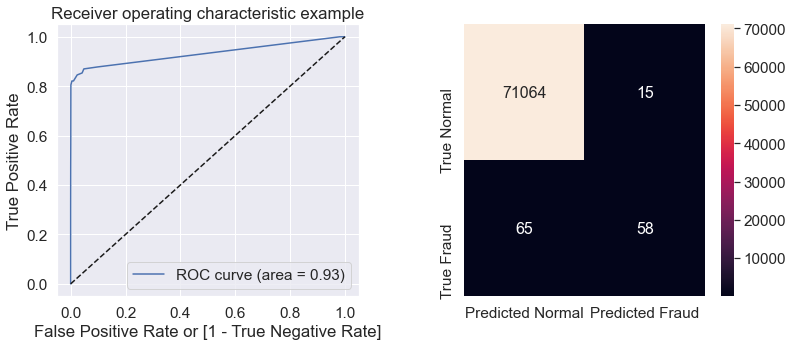

AUC_ROC: 0.932
F1 score :  0.592
Precision :  0.795
Recall :  0.472
Optimal threshold is 0.557


In [43]:
#ROC test data
result_df = roc_confusion_matrix(result_df,y_test,y_test_pred_proba_dt,flagtrain=False,opt_threshold = dt_threshold,model='DecisionTree_Imbalanced')

<b> 3. XGBOOST <b>

In [44]:
#XGBoost  with default parameters.
from xgboost import XGBClassifier
xgboost = XGBClassifier(random_state=42) 
xgboost.fit(X_train_pwtr, y_train)

#predict on train data
y_pred = xgboost.predict(X_train_pwtr)

#Evaluation metrics
print("Accuracy: {0}".format(metrics.accuracy_score(y_train, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_train, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_train, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_train, y_pred)))

[15:51:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 1.0
Recall/Sensitivity: 1.0
Precision: 1.0
Roc_Auc_score: 1.0


In [45]:
#hyperparamter tuning XGBoost on imbalanced data
xgbc_tuned = XGBClassifier(random_state=42, n_jobs=-1,seed=42,gamma=0.9,reg_alpha=0.1,tree_method='hist')
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

param_comb = 15
#perform cross validation 
params = { 
        'n_estimators':range(120,150),
        'max_depth': [3, 4, 5],
        'min_child_weight':range(1,6,2),
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'learning_rate':list(np.arange(0.05,0.5,0.02))
          }


xgbc_cv = RandomizedSearchCV(xgbc_tuned, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=folds.split(X_train_pwtr,y_train), verbose=3, random_state=42)


xgbc_cv.fit(X_train_pwtr,y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[15:54:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000185FBE60350>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=0.9,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, miss...
                                                          0.29000000000000004,
                                                          0.31000000000000005,
                                                          0.33,
                                           

In [46]:
# Best hyperparameters
print(xgbc_cv.best_score_)
print(xgbc_cv.best_params_)

0.9880534966381876
{'subsample': 1.0, 'n_estimators': 136, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.07, 'colsample_bytree': 0.6}


In [47]:
# assign best estimators
xgbc_tuned.set_params(**xgbc_cv.best_estimator_.get_params())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=136, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1.0, tree_method='hist', validate_parameters=1,
              verbosity=None)

In [48]:
# Fit xgbc with best hyperparameters
xgbc_tuned.fit(X_train_pwtr,y_train)

[15:54:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=136, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1.0, tree_method='hist', validate_parameters=1,
              verbosity=None)

In [49]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_xgbc = xgbc_tuned.predict_proba(X_train_pwtr)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_xgbc = xgbc_tuned.predict_proba(X_test_pwtr)[:,1]

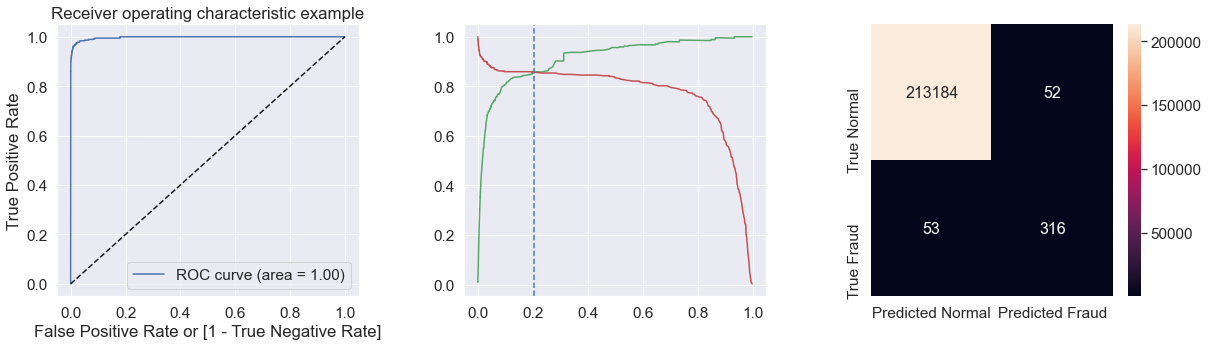

AUC_ROC: 0.997
F1 score :  0.858
Precision :  0.859
Recall :  0.856
Optimal threshold is 0.203


In [50]:
#Roc for train data
xgbc_threshold = roc_confusion_matrix(result_df,y_train,y_train_pred_proba_xgbc,flagtrain=True,model='XGBoost_Imbalanced')

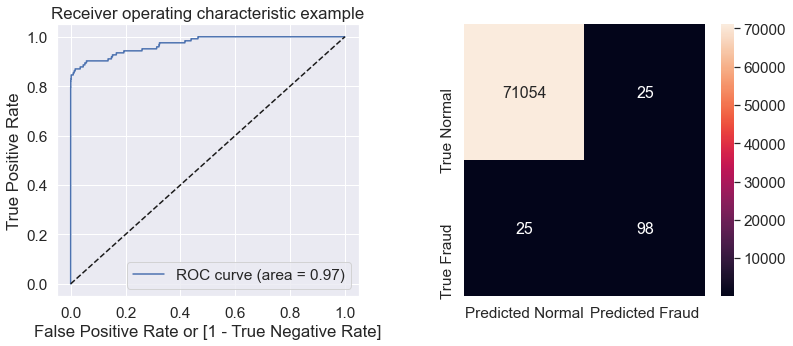

AUC_ROC: 0.971
F1 score :  0.797
Precision :  0.797
Recall :  0.797
Optimal threshold is 0.203


In [51]:
#ROC test data
result_df = roc_confusion_matrix(result_df,y_test,y_test_pred_proba_xgbc,flagtrain=False,opt_threshold = xgbc_threshold,model='XGBoost_Imbalanced')

#### 4. Random Forest

In [52]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_pwtr,y_train)

#predict on train data
y_pred = rfc.predict(X_train_pwtr)

#Evaluation metrics
print("Accuracy: {0}".format(metrics.accuracy_score(y_train, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_train, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_train, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_train, y_pred)))

Accuracy: 0.9999953184616465
Recall/Sensitivity: 0.997289972899729
Precision: 1.0
Roc_Auc_score: 0.9986449864498645


In [53]:
#hyperparameter tuning Random Forest 
rfc_tuned = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {
    'max_depth': [4,5,6,7],
    'n_estimators':range(60,100,5) 
         }

rfc_cv = RandomizedSearchCV(estimator=rfc_tuned, param_distributions=params, scoring='roc_auc',
                            cv=folds.split(X_train_pwtr,y_train),n_jobs=-1,verbose=3)
# Fit the grid search to the data
rfc_cv.fit(X_train_pwtr,y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000018585250EB0>,
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'n_estimators': range(60, 100, 5)},
                   scoring='roc_auc', verbose=3)

In [54]:
# Best hyperparameters
print(rfc_cv.best_score_)
print(rfc_cv.best_params_)

0.981679919855282
{'n_estimators': 70, 'max_depth': 7}


In [55]:
# assign best estimators
rfc_tuned.set_params(**rfc_cv.best_estimator_.get_params())

RandomForestClassifier(max_depth=7, n_estimators=70, random_state=42)

In [56]:
# Fit RF with best hyperparameters
rfc_tuned.fit(X_train_pwtr,y_train)

RandomForestClassifier(max_depth=7, n_estimators=70, random_state=42)

In [57]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_rfc = rfc_tuned.predict_proba(X_train_pwtr)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_rfc = rfc_tuned.predict_proba(X_test_pwtr)[:,1]

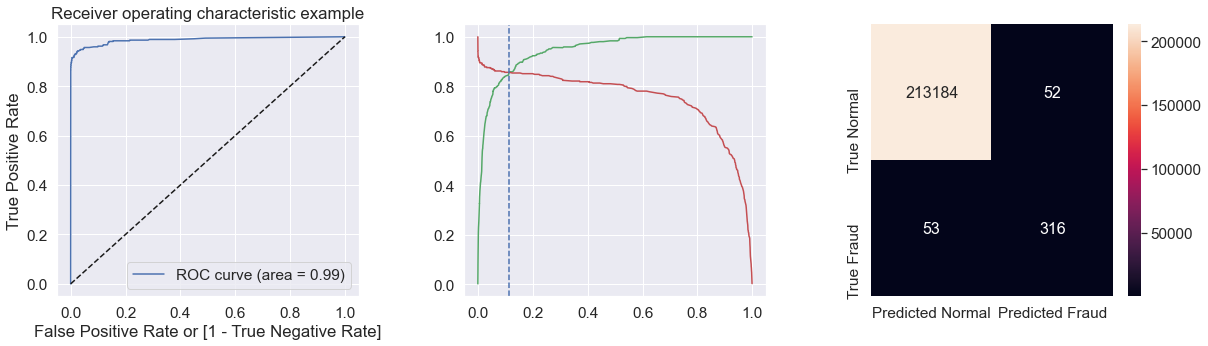

AUC_ROC: 0.988
F1 score :  0.858
Precision :  0.859
Recall :  0.856
Optimal threshold is 0.114


In [58]:
#Roc for train data
rfc_threshold = roc_confusion_matrix(result_df,y_train,y_train_pred_proba_rfc,flagtrain=True,model='RandomForest_Imbalanced')

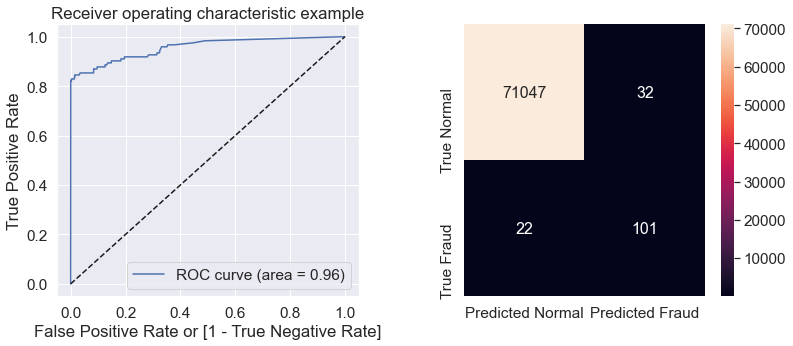

AUC_ROC: 0.956
F1 score :  0.789
Precision :  0.759
Recall :  0.821
Optimal threshold is 0.114


In [59]:
#ROC test data
result_df = roc_confusion_matrix(result_df,y_test,y_test_pred_proba_rfc,flagtrain=False,opt_threshold = rfc_threshold,model='RandomForest_Imbalanced')

#### 5. KNN

In [60]:
# KNN
knn_tuned = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}


knn_cv = RandomizedSearchCV(knn_tuned, param_distributions=params, scoring='roc_auc', 
                                   n_jobs=-1, cv=folds, verbose=1, random_state=42)


knn_cv.fit(X_train_pwtr,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [61]:

# Best hyperparameters
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.9238915071820377
{'n_neighbors': 7}


In [62]:
# assign best estimators
knn_tuned.set_params(**knn_cv.best_estimator_.get_params())

# Fit knn with best hyperparameters
knn_tuned.fit(X_train_pwtr,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [63]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_knn = knn_tuned.predict_proba(X_train_pwtr)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_knn = knn_tuned.predict_proba(X_test_pwtr)[:,1]

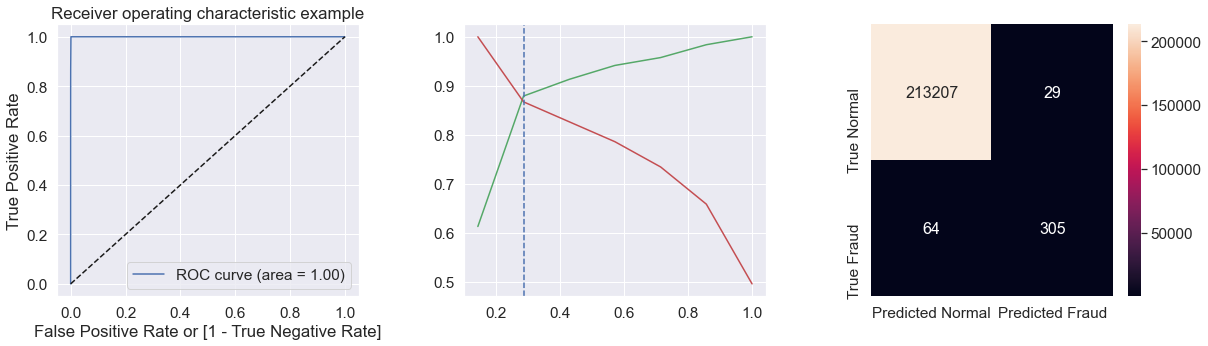

AUC_ROC: 1.0
F1 score :  0.868
Precision :  0.913
Recall :  0.827
Optimal threshold is 0.286


In [64]:
#Roc for train data
knn_threshold = roc_confusion_matrix(result_df,y_train,y_train_pred_proba_knn,flagtrain=True,model='KNN_Imbalanced')

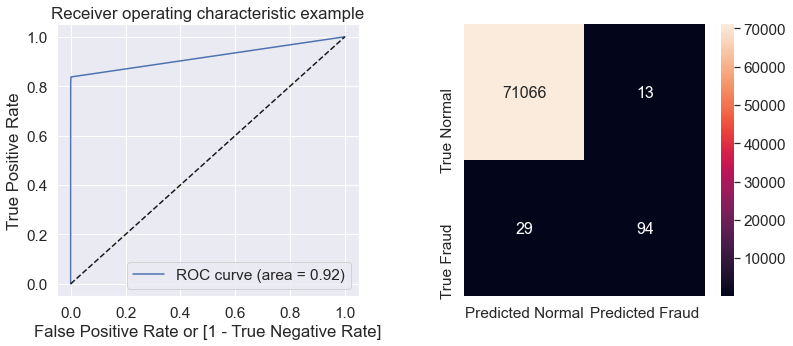

AUC_ROC: 0.919
F1 score :  0.817
Precision :  0.879
Recall :  0.764
Optimal threshold is 0.286


In [65]:
#ROC test data
result_df = roc_confusion_matrix(result_df,y_test,y_test_pred_proba_knn,flagtrain=False,opt_threshold = knn_threshold,model='KNN_Imbalanced')

In [66]:
# Imbalanced data model evaluation metrics
result_df

Model  AUC_ROC     F1  Recall  Precision  Threshold
0   LogisticReg_Imbalanced    0.973  0.758   0.764      0.752      0.120
1  DecisionTree_Imbalanced    0.932  0.592   0.472      0.795      0.557
2       XGBoost_Imbalanced    0.971  0.797   0.797      0.797      0.203
3  RandomForest_Imbalanced    0.956  0.789   0.821      0.759      0.114
4           KNN_Imbalanced    0.919  0.817   0.764      0.879      0.286

**From the above summary results of models on imbalanced dataset, we can say `XGBoost` has highest AUC_ROC (0.97) , good  F1  and precision score**

[18:12:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


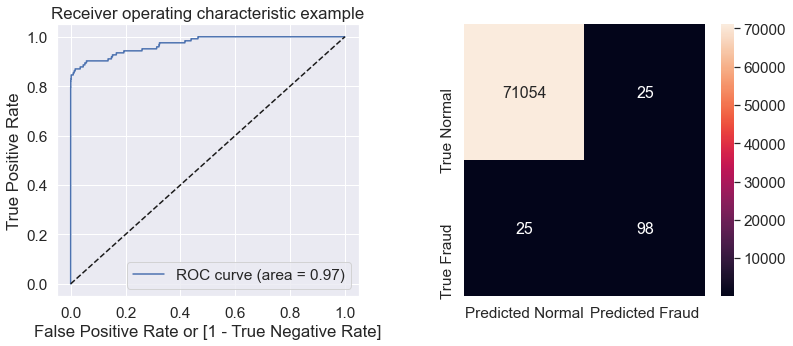

AUC_ROC: 0.971
F1 score :  0.797
Precision :  0.797
Recall :  0.797
Optimal threshold is 0.203


In [101]:
# Proceed with the model which shows the best result which is  XGBoost
# Apply the best hyperparameter on the model
# Predict on the test dataset


clf_threshold = xgbc_threshold
clf = XGBClassifier(random_state=42, n_jobs=-1,seed=42,gamma=0.9,reg_alpha=0.1,tree_method='hist')
clf.set_params(**xgbc_cv.best_estimator_.get_params())
clf.fit(X_train_pwtr,y_train)

clf_y_test_pred = clf.predict(X_test_pwtr)
clf_y_test_pred_prob = clf.predict_proba(X_test_pwtr)[:,1] 

#ROC test data
result_df = roc_confusion_matrix(result_df,y_test,clf_y_test_pred_prob,flagtrain=False,opt_threshold = clf_threshold,model='XGBoost_Imbalanced_Best')

#### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 7


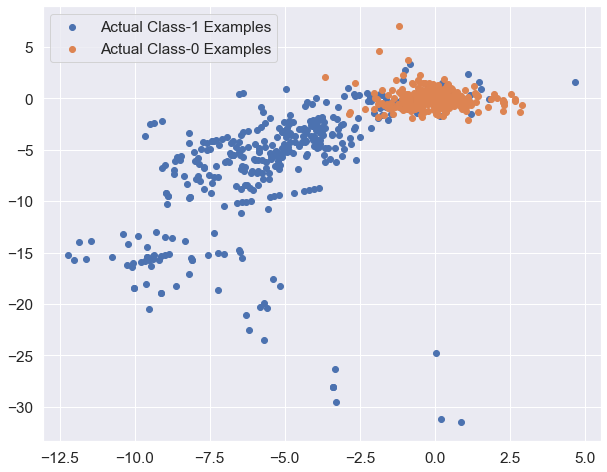

In [68]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_pwtr.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pwtr.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Model building with Balanced Classes

<b>Handling class imbalance using below Oversampling methods:
    1. SMOTE
    2. ADASYN
    3. Random OverSampling
<b> 
    


### OverSampling using SMOTE 

In this process, you can generate new data points that lie vectorially between two data points that belong to the minority class.

In [69]:
#Smote OverSampling
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train_pwtr, y_train)


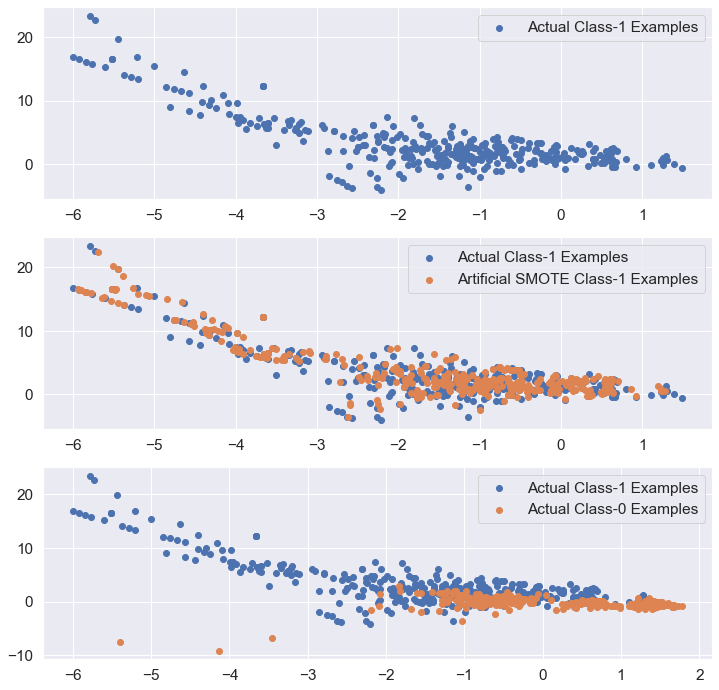

In [70]:
# Distribution before and after appyling SMote Oversampling
X_train_smote_1 = X_train_smote.to_numpy()[X_train.shape[0]:]

X_train_1 = X_train_pwtr.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pwtr.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [12, 12]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [71]:
#check
X_train_smote.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.410410 -0.147528 -0.841174  0.396367 -0.124241 -1.010984  0.170590   
1 -0.677525 -0.339435 -1.142599 -0.390072  0.198429 -0.313779  2.963931   
2 -0.835692  0.761475  1.177396  0.076002 -0.005779 -0.560710  0.604764   
3  1.207858 -0.528473 -0.350417  0.394845 -0.657817 -0.118650 -0.567704   
4 -1.025098 -3.643983 -1.618210  0.532563 -2.213816  0.296549  1.280535   

         V8        V9       V10       V11       V12       V13       V14  \
0 -0.368933  0.780021 -0.042677 -0.813843  0.131942 -0.530559  0.441788   
1 -0.640268 -1.269840 -0.676379  0.379486  0.187639 -0.021491  1.047495   
2 -0.165182 -0.176322  0.256200  0.630391  1.124264  1.362390 -0.387572   
3  0.027697  0.966232  0.197215  0.740528  0.811786 -0.578376  0.040572   
4 -0.551575 -0.036066 -0.119871 -0.752716 -0.880632  0.077701  0.073038   

        V15       V16       V17       V18       V19       V20       V21  \
0  0.201919 -0.446304 -0.356143 -0.720688  0.225619 -0.344945 -0.334105   
1 -1.484327 -0.562105 -0.767834  0.230722  0.342322  1.243356  0.972659   
2  1.082005 -0.503703 -0.115408 -1.399937 -0.682783  0.274999 -0.332628   
3 -0.351535  0.431830 -0.725558  0.543699 -0.111794 -0.146964  0.405944   
4  1.024194  2.353337  0.017277 -0.961335 -0.151533  5.381592  1.631087   

        V22       V23       V24       V25       V26       V27       V28  \
0 -0.864704  0.464383 -0.099398 -0.306384 -1.306578 -0.064078 -0.138665   
1  1.825313  1.148596 -0.634403  0.259975  1.657002 -0.273591  0.632868   
2 -0.340779  0.261243  1.074809 -0.503019  0.111638 -0.379645 -1.129693   
3  1.203656  0.137610  0.023011 -0.644226  1.204633 -0.120571 -0.143325   
4 -1.419809 -2.120378  1.433526 -2.221633 -1.559876 -0.941893  0.978258   

     Amount  
0 -0.126381  
1  1.766553  
2 -0.326470  
3  0.691379  
4  2.483170

#### 1. Logistic Regression

In [72]:
#LOGISTIC REGRESSION Smote
logreg_tuned_smote = LogisticRegression(random_state=42)

folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

params = {'C':[0.005,0.1, 0.2,0.3, 0.4], 'penalty':['l1','l2'],
         'solver' : ['liblinear']}


logreg_cv_smote = GridSearchCV(estimator = logreg_tuned_smote , cv = folds.split(X_train_smote,y_train_smote), param_grid = params, scoring  = 'roc_auc')

In [73]:
logreg_cv_smote.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000185E608BEB0>,
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.005, 0.1, 0.2, 0.3, 0.4],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [74]:
print(logreg_cv_smote.best_score_)
print(logreg_cv_smote.best_params_)

0.9911874289618737
{'C': 0.4, 'penalty': 'l2', 'solver': 'liblinear'}


In [75]:
# assign best estimators
logreg_tuned_smote.set_params(**logreg_cv_smote.best_estimator_.get_params())

LogisticRegression(C=0.4, random_state=42, solver='liblinear')

In [76]:
# predict fraud on train data based on best estimators and values
logreg_tuned_smote.fit(X_train_smote, y_train_smote)

y_train_pred_proba_lr = logreg_tuned_smote.predict_proba(X_train_smote)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_lr = logreg_tuned_smote.predict_proba(X_test_pwtr)[:,1]

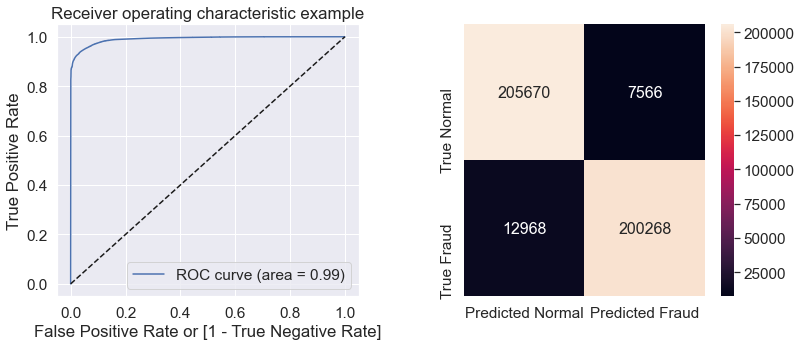

AUC_ROC: 0.991
F1 score :  0.951
Precision :  0.964
Recall :  0.939
Optimal threshold is 0.415


In [77]:
# Roc for train
logreg_threshold_smote = roc_confusion_matrix2(result_df_bal,y_train_smote,y_train_pred_proba_lr,flagtrain=True,model='LogisticReg_Smote')

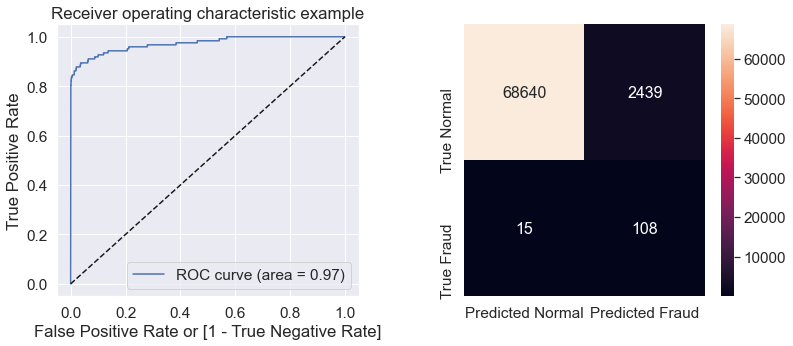

AUC_ROC: 0.972
F1 score :  0.081
Precision :  0.042
Recall :  0.878
Optimal threshold is 0.415


In [78]:
# ROC for test with optimal threshold

result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,y_test_pred_proba_lr,flagtrain=False,opt_threshold = logreg_threshold_smote,model='LogisticReg_Smote')

#### 2. Decision Tree

In [79]:
#hyperparameter tuning decision tree 
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
# Create the parameter grid 
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}


# Instantiate the grid search model
dt_tuned_smote = DecisionTreeClassifier(random_state=42)
dt_cv_smote = GridSearchCV(estimator = dt_tuned_smote, param_grid = params, 
                          cv = folds.split(X_train_smote,y_train_smote), scoring  = 'roc_auc',n_jobs=-1,verbose=1)

# Fit the grid search to the data
dt_cv_smote.fit(X_train_smote,y_train_smote) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000185F9F2A120>,
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [80]:
# Best hyperparameters
print(dt_cv_smote.best_score_)
print(dt_cv_smote.best_params_)

0.9988758554812671
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [81]:
# assign best estimators
dt_tuned_smote.set_params(**dt_cv_smote.best_estimator_.get_params())

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

In [82]:
# Fit dt with best hyperparameters
dt_tuned_smote.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

In [83]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_dt = dt_tuned_smote.predict_proba(X_train_smote)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_dt = dt_tuned_smote.predict_proba(X_test_pwtr)[:,1]

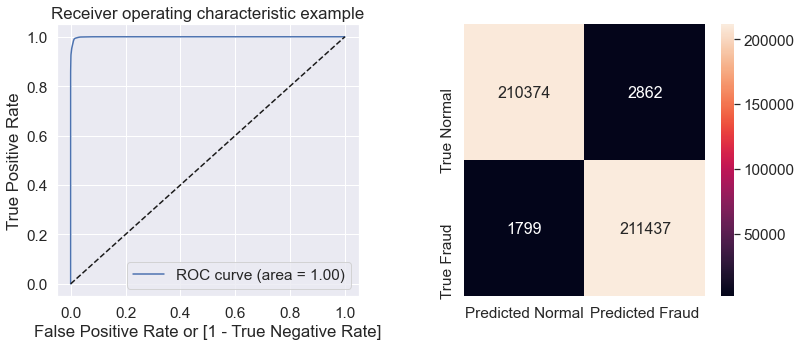

AUC_ROC: 0.999
F1 score :  0.989
Precision :  0.987
Recall :  0.992
Optimal threshold is 0.52


In [84]:
#Roc for train data
dt_threshold_smote = roc_confusion_matrix2(result_df_bal,y_train_smote,y_train_pred_proba_dt,flagtrain=True,model='DecisionTree_Smote')

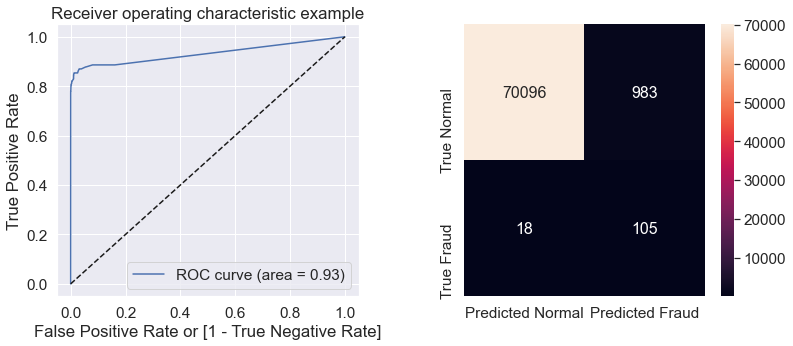

AUC_ROC: 0.932
F1 score :  0.173
Precision :  0.097
Recall :  0.854
Optimal threshold is 0.52


In [85]:
#ROC test data
result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,y_test_pred_proba_dt,flagtrain=False,opt_threshold = dt_threshold_smote,model='DecisionTree_Smote')

#### 3. XGBOOST 

In [86]:
#hyperparamter tuning XGBoost 
xgbc_tuned_smote = XGBClassifier(random_state=42, n_jobs=-1,seed=42,gamma=0.9,reg_alpha=0.1,tree_method='hist')
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

param_comb = 15
#perform cross validation 
params = { 
        'n_estimators':range(120,150),
        'max_depth': [3, 4, 5],
        'min_child_weight':range(1,6,2),
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'learning_rate':list(np.arange(0.05,0.5,0.02))
          }


xgbc_cv_smote = RandomizedSearchCV(xgbc_tuned_smote, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=folds.split(X_train_smote,y_train_smote), verbose=1, random_state=42)


xgbc_cv_smote.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[17:46:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001858613ECF0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=0.9,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, miss...
                                                          0.29000000000000004,
                                                          0.31000000000000005,
                                                          0.33,
                                           

In [87]:
# Best hyperparameters
print(xgbc_cv_smote.best_score_)
print(xgbc_cv_smote.best_params_)

0.9999944048396493
{'subsample': 0.6, 'n_estimators': 128, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.49000000000000005, 'colsample_bytree': 0.8}


In [88]:
# assign best estimators
xgbc_tuned_smote.set_params(**xgbc_cv_smote.best_estimator_.get_params())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.49000000000000005, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=128, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=0.6, tree_method='hist', validate_parameters=1,
              verbosity=None)

In [89]:
# Fit xgbc with best hyperparameters
xgbc_tuned_smote.fit(X_train_smote,y_train_smote)

[17:46:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.49000000000000005, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=128, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=0.6, tree_method='hist', validate_parameters=1,
              verbosity=None)

In [90]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_xgbc = xgbc_tuned_smote.predict_proba(X_train_smote)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_xgbc = xgbc_tuned_smote.predict_proba(X_test_pwtr.values)[:,1]

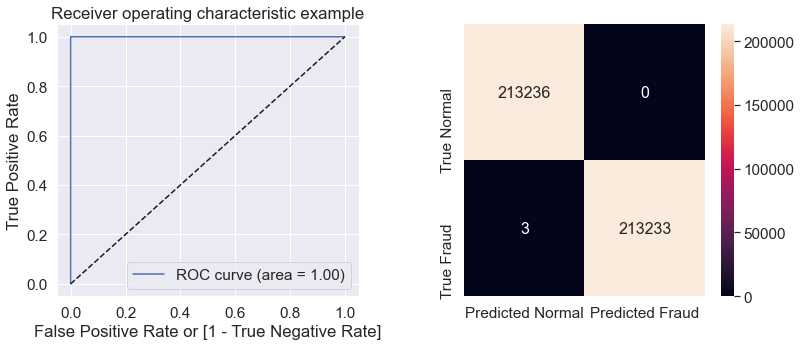

AUC_ROC: 1.0
F1 score :  1.0
Precision :  1.0
Recall :  1.0
Optimal threshold is 0.931


In [91]:
#Roc for train data
xgbc_threshold_smote = roc_confusion_matrix2(result_df_bal,y_train_smote,y_train_pred_proba_xgbc,flagtrain=True,model='XGBoost_Smote')

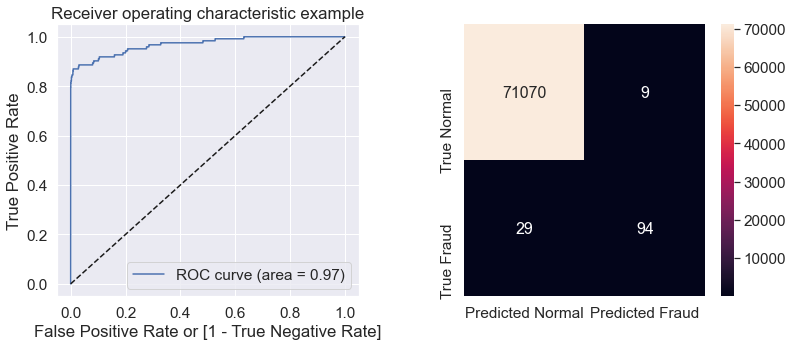

AUC_ROC: 0.969
F1 score :  0.832
Precision :  0.913
Recall :  0.764
Optimal threshold is 0.931


In [92]:
#ROC test data
result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,y_test_pred_proba_xgbc,flagtrain=False,opt_threshold = xgbc_threshold_smote,model='XGBoost_Smote')

#### 4. Random Forest 


In [93]:
# Tune Hyperpaprameter
rfc_tuned_smote = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

params = {
    'max_depth': [4,5,6,7],
    'n_estimators':range(60,100,5) 
         }


rfc_cv_smote = RandomizedSearchCV(estimator=rfc_tuned_smote, param_distributions=params, scoring='roc_auc',
                            cv=folds.split(X_train_smote,y_train_smote),n_jobs=-1,verbose=3)
# Fit the grid search to the data
rfc_cv_smote.fit(X_train_smote,y_train_smote) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000185E6BB70B0>,
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'n_estimators': range(60, 100, 5)},
                   scoring='roc_auc', verbose=3)

In [94]:
# Best hyperparameters
print(rfc_cv_smote.best_score_)
print(rfc_cv_smote.best_params_)

0.9974182844462355
{'n_estimators': 95, 'max_depth': 7}


In [95]:
# assign best estimators
rfc_tuned_smote.set_params(**rfc_cv_smote.best_estimator_.get_params())

RandomForestClassifier(max_depth=7, n_estimators=95, random_state=42)

In [96]:
# Fit rfc with best hyperparameters
rfc_tuned_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=7, n_estimators=95, random_state=42)

In [97]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_rfc = rfc_tuned_smote.predict_proba(X_train_smote)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_rfc = rfc_tuned_smote.predict_proba(X_test_pwtr.values)[:,1]

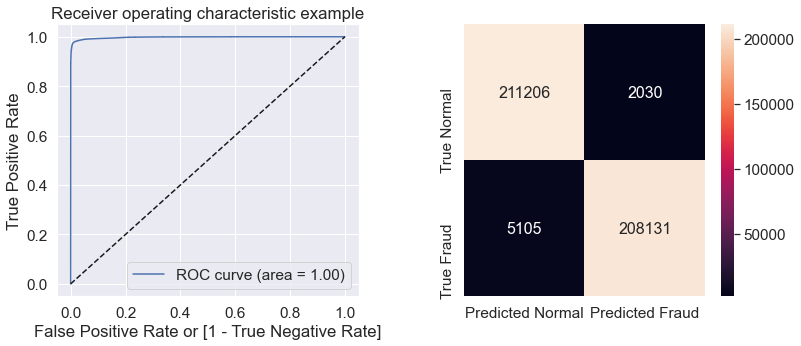

AUC_ROC: 0.998
F1 score :  0.983
Precision :  0.99
Recall :  0.976
Optimal threshold is 0.352


In [98]:
#Roc for train data
rfc_threshold_smote = roc_confusion_matrix2(result_df_bal,y_train_smote,y_train_pred_proba_rfc,flagtrain=True,model='RandomForest_Smote')

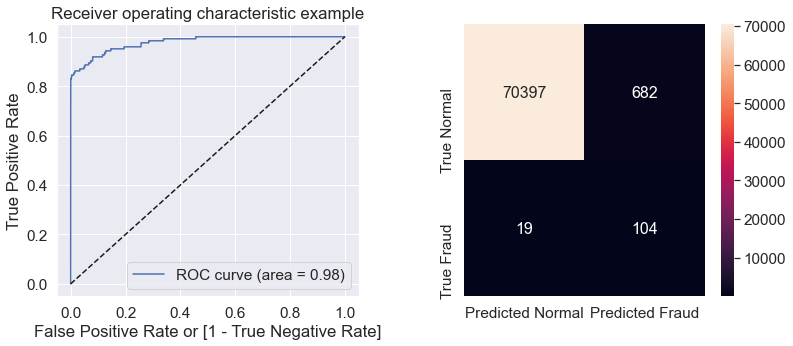

AUC_ROC: 0.977
F1 score :  0.229
Precision :  0.132
Recall :  0.846
Optimal threshold is 0.352


In [99]:
#ROC test data
result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,y_test_pred_proba_rfc,flagtrain=False,opt_threshold = rfc_threshold_smote,model='RandomForest_Smote')

In [100]:
#Evaluation metrics after balancing using Smote
result_df_bal

Model  AUC_ROC     F1  Recall  Precision  Threshold
0   LogisticReg_Smote    0.972  0.081   0.878      0.042      0.415
1  DecisionTree_Smote    0.932  0.173   0.854      0.097      0.520
2       XGBoost_Smote    0.969  0.832   0.764      0.913      0.931
3  RandomForest_Smote    0.977  0.229   0.846      0.132      0.352

####  From above summary , we can observe that XGBoost using Smote oversampling has good AUC_ROC , F1 and precision scores

### OverSampling using Adasyn 

In this process , for a particular data point the number of synthetic samples that it will add will have a density distribution.

In [102]:
#Balancing using Adasyn
ada = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pwtr, y_train)

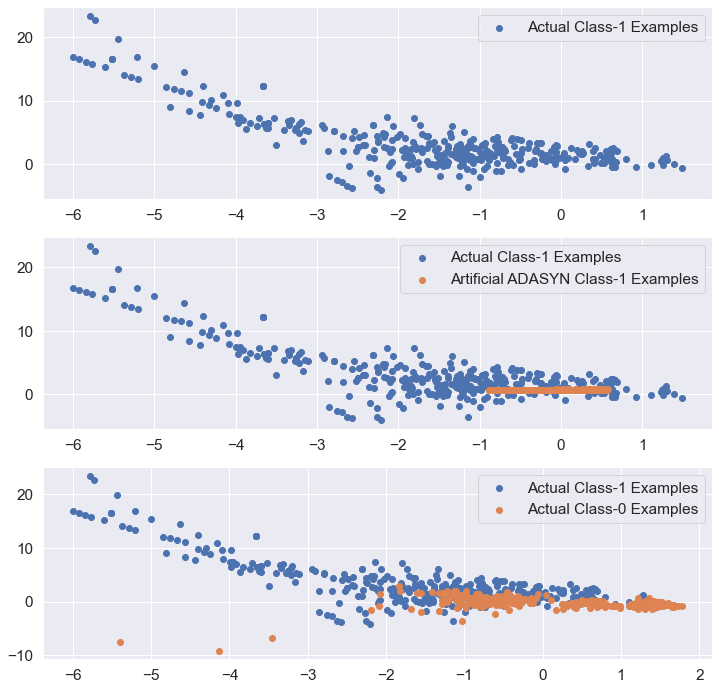

In [103]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn.to_numpy()[X_train.shape[0]:]

X_train_1 = X_train_pwtr.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pwtr.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [12, 12]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [104]:
#Check
X_train_adasyn

V1        V2        V3        V4        V5        V6        V7  \
0       1.410410 -0.147528 -0.841174  0.396367 -0.124241 -1.010984  0.170590   
1      -0.677525 -0.339435 -1.142599 -0.390072  0.198429 -0.313779  2.963931   
2      -0.835692  0.761475  1.177396  0.076002 -0.005779 -0.560710  0.604764   
3       1.207858 -0.528473 -0.350417  0.394845 -0.657817 -0.118650 -0.567704   
4      -1.025098 -3.643983 -1.618210  0.532563 -2.213816  0.296549  1.280535   
...          ...       ...       ...       ...       ...       ...       ...   
426472 -0.193766  0.436642 -0.484714  0.147813  0.632578 -0.296317  0.375396   
426473  0.208042 -0.169689 -1.081208  0.110274  0.400982 -0.700006  0.918292   
426474  0.030751 -0.111178 -0.961457 -0.011489  0.463187 -0.575801  0.991982   
426475  0.383914 -0.227731 -1.200002  0.231063  0.339276 -0.823217  0.845192   
426476 -0.466979  0.330727 -0.164057  0.236083  0.642817 -0.392299  0.989215   

              V8        V9       V10       V11       V12       V13       V14  \
0      -0.368933  0.780021 -0.042677 -0.813843  0.131942 -0.530559  0.441788   
1      -0.640268 -1.269840 -0.676379  0.379486  0.187639 -0.021491  1.047495   
2      -0.165182 -0.176322  0.256200  0.630391  1.124264  1.362390 -0.387572   
3       0.027697  0.966232  0.197215  0.740528  0.811786 -0.578376  0.040572   
4      -0.551575 -0.036066 -0.119871 -0.752716 -0.880632  0.077701  0.073038   
...          ...       ...       ...       ...       ...       ...       ...   
426472 -0.023185 -0.108953 -0.150065  1.110402  0.163719 -0.570181 -0.773248   
426473 -0.367238  0.535167 -1.498502 -0.583475  0.265673  0.577463 -1.880119   
426474 -0.337571  0.439793 -1.525855 -0.645957  0.324342  0.754408 -1.843416   
426475 -0.396668  0.629777 -1.471368 -0.521494  0.207474  0.401933 -1.916529   
426476 -0.206423 -0.265667 -1.156830 -0.437002  0.064597  0.599130 -1.572111   

             V15       V16       V17       V18       V19       V20       V21  \
0       0.201919 -0.446304 -0.356143 -0.720688  0.225619 -0.344945 -0.334105   
1      -1.484327 -0.562105 -0.767834  0.230722  0.342322  1.243356  0.972659   
2       1.082005 -0.503703 -0.115408 -1.399937 -0.682783  0.274999 -0.332628   
3      -0.351535  0.431830 -0.725558  0.543699 -0.111794 -0.146964  0.405944   
4       1.024194  2.353337  0.017277 -0.961335 -0.151533  5.381592  1.631087   
...          ...       ...       ...       ...       ...       ...       ...   
426472 -0.242382 -0.014962  0.784889  0.378449  1.219221  0.091523 -0.367159   
426473 -0.484350 -0.039241  1.481881  0.472220 -0.027169  0.502638  0.003471   
426474 -0.577740 -0.012430  1.280369  0.391830 -0.035700  0.509770 -0.006608   
426475 -0.391708 -0.065837  1.681780  0.551967 -0.018707  0.495562  0.013469   
426476 -0.460070  0.399851  0.811908  0.012256 -1.001999  0.214683 -0.052176   

             V22       V23       V24       V25       V26       V27       V28  \
0      -0.864704  0.464383 -0.099398 -0.306384 -1.306578 -0.064078 -0.138665   
1       1.825313  1.148596 -0.634403  0.259975  1.657002 -0.273591  0.632868   
2      -0.340779  0.261243  1.074809 -0.503019  0.111638 -0.379645 -1.129693   
3       1.203656  0.137610  0.023011 -0.644226  1.204633 -0.120571 -0.143325   
4      -1.419809 -2.120378  1.433526 -2.221633 -1.559876 -0.941893  0.978258   
...          ...       ...       ...       ...       ...       ...       ...   
426472 -0.954777  0.219839  1.014448 -1.141829  0.589177  0.227717  0.055670   
426473 -0.336538  0.272089  0.079124 -0.297441 -0.739216 -0.007847  0.263383   
426474 -0.343184  0.440935  0.233104 -0.477937 -0.648917  0.005498  0.292858   
426475 -0.329945  0.104595 -0.073625 -0.118388 -0.828793 -0.021086  0.234143   
426476 -0.404612  0.478660  0.466321 -0.860039 -0.570885  0.044788  0.406550   

          Amount  
0      -0.126381  
1       1.766553  
2      -0.326470  
3       0.691379  
4       2.483170  
...          ...  
426472 -0.812284  
426473  1.333517  

#### 1. Logistic Regression

In [105]:
#logistic regression
logreg_tuned_adasyn = LogisticRegression(random_state=42)

folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

params = {'C':[0.005,0.1, 0.2,0.3, 0.4], 'penalty':['l1','l2'],
         'solver' : ['liblinear']}


logreg_cv_adasyn = GridSearchCV(estimator = logreg_tuned_adasyn , cv = folds.split(X_train_adasyn,y_train_adasyn), param_grid = params, scoring  = 'roc_auc')

logreg_cv_adasyn.fit(X_train_adasyn, y_train_adasyn)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000185ED09F2E0>,
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.005, 0.1, 0.2, 0.3, 0.4],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [106]:
print(logreg_cv_adasyn.best_score_)
print(logreg_cv_adasyn.best_params_)

0.9687890917319095
{'C': 0.4, 'penalty': 'l2', 'solver': 'liblinear'}


In [107]:
# assign best estimators
logreg_tuned_adasyn.set_params(**logreg_cv_adasyn.best_estimator_.get_params())

LogisticRegression(C=0.4, random_state=42, solver='liblinear')

In [108]:
# predict fraud on train data based on best estimators and values
logreg_tuned_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_train_pred_proba_lr = logreg_tuned_adasyn.predict_proba(X_train_adasyn)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_lr = logreg_tuned_adasyn.predict_proba(X_test_pwtr)[:,1]

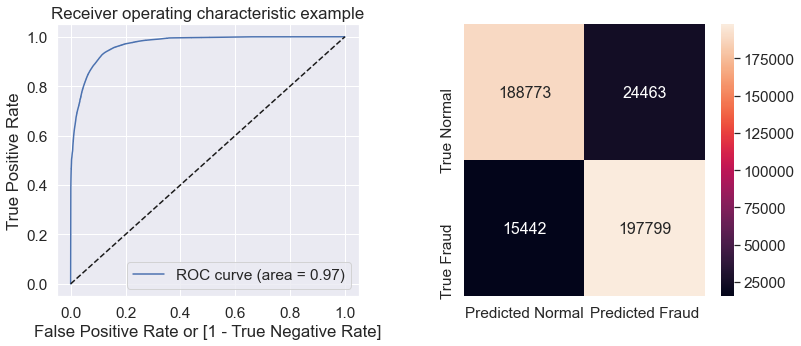

AUC_ROC: 0.969
F1 score :  0.908
Precision :  0.89
Recall :  0.928
Optimal threshold is 0.4


In [109]:
# Roc for train
logreg_threshold_adasyn = roc_confusion_matrix2(result_df_bal,y_train_adasyn,y_train_pred_proba_lr,flagtrain=True,model='LogisticReg_Adasyn')

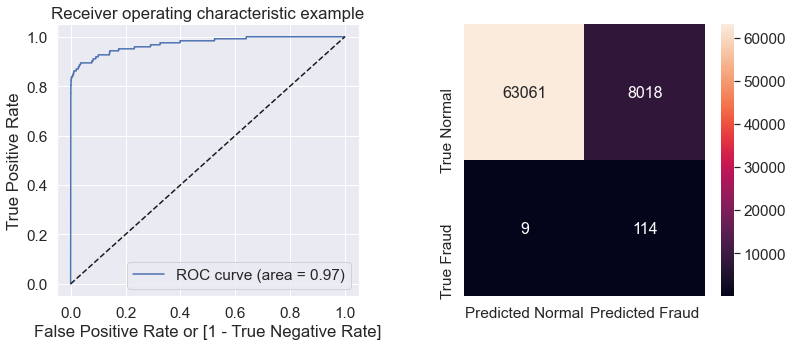

AUC_ROC: 0.972
F1 score :  0.028
Precision :  0.014
Recall :  0.927
Optimal threshold is 0.4


In [110]:
# ROC for test with optimal threshold
result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,y_test_pred_proba_lr,flagtrain=False,opt_threshold = logreg_threshold_adasyn,model='LogisticReg_Adasyn')

#### 2. Decision tree

In [111]:
#hyperparameter tuning decision tree
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
# Create the parameter grid 
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50)
}

# Instantiate the grid search model
dt_tuned_adasyn = DecisionTreeClassifier(random_state=42,criterion='entropy')
dt_cv_adasyn = GridSearchCV(estimator = dt_tuned_adasyn, param_grid = params, 
                          cv = folds.split(X_train_adasyn,y_train_adasyn), scoring  = 'roc_auc',verbose=1,n_jobs=-1)

# Fit the grid search to the data
dt_cv_adasyn.fit(X_train_adasyn,y_train_adasyn) 


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001858611FF20>,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [112]:
# Best hyperparameters
print(dt_cv_adasyn.best_score_)
print(dt_cv_adasyn.best_params_)

# assign best estimators
dt_tuned_adasyn.set_params(**dt_cv_adasyn.best_estimator_.get_params())
# Fit dt with best hyperparameters
dt_tuned_adasyn.fit(X_train_adasyn,y_train_adasyn)


0.9958960540480536
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

In [113]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_dt = dt_tuned_adasyn.predict_proba(X_train_adasyn)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_dt = dt_tuned_adasyn.predict_proba(X_test_pwtr)[:,1]


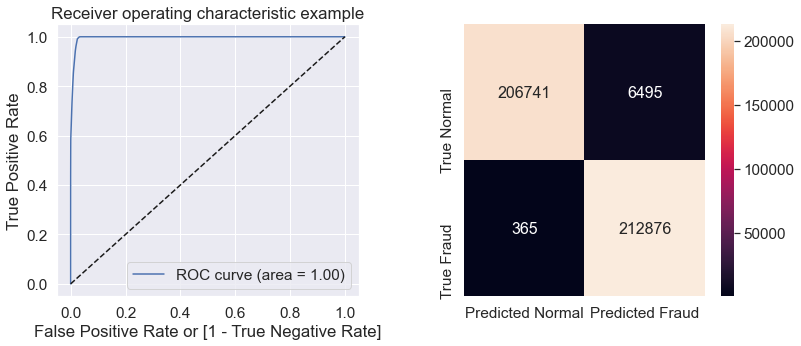

AUC_ROC: 0.996
F1 score :  0.984
Precision :  0.97
Recall :  0.998
Optimal threshold is 0.52


In [114]:
#Roc for train data
dt_threshold_adasyn = roc_confusion_matrix2(result_df_bal,y_train_adasyn,y_train_pred_proba_dt,flagtrain=True,model='DecisionTree_Adasyn')


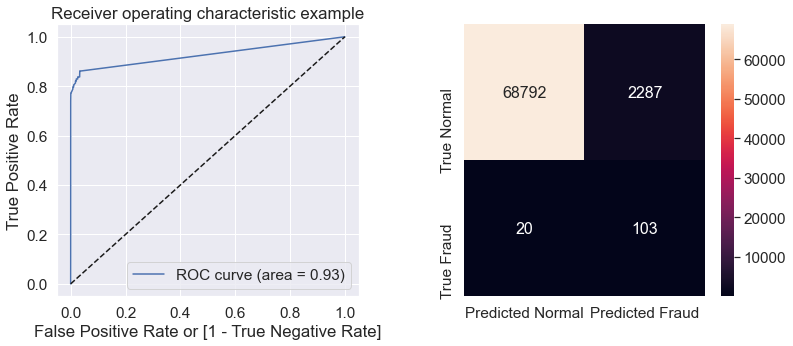

AUC_ROC: 0.926
F1 score :  0.082
Precision :  0.043
Recall :  0.837
Optimal threshold is 0.52


In [115]:
#ROC test data
result_df_bal = roc_confusion_matrix2(result_df_bal ,y_test,y_test_pred_proba_dt,flagtrain=False,opt_threshold = dt_threshold_adasyn,model='DecisionTree_Adasyn')

#### 3. XGBoost

In [116]:
#hyperparamter
xgbc_tuned_adasyn = XGBClassifier(random_state=42, n_jobs=-1,seed=42,gamma=0.9,reg_alpha=0.1,tree_method='hist',max_depth=3)
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

param_comb = 15
#perform cross validation 
params = { 
        'n_estimators':range(130,150),
        'min_child_weight':range(1,6,2),
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'learning_rate':list(np.arange(0.05,0.5,0.02))
          }


xgbc_cv_adasyn = RandomizedSearchCV(xgbc_tuned_adasyn, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=folds.split(X_train_adasyn,y_train_adasyn), verbose=3, random_state=42)


xgbc_cv_adasyn.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[18:23:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000185FBE60660>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=0.9,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=3,
                                           min_child_weight=None, missing...
                                                          0.25000000000000006,
                                                          0.27,
                                                          0.29000000000000004,
                                           

In [117]:
# Best hyperparameters
print(xgbc_cv_adasyn.best_score_)
print(xgbc_cv_adasyn.best_params_)

# assign best estimators
xgbc_tuned_adasyn.set_params(**xgbc_cv_adasyn.best_estimator_.get_params())

# Fit xgvc with best hyperparameters
xgbc_tuned_adasyn.fit(X_train_adasyn,y_train_adasyn)

0.9999602452986582
{'subsample': 1.0, 'n_estimators': 148, 'min_child_weight': 3, 'learning_rate': 0.4100000000000001, 'colsample_bytree': 1.0}
[18:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4100000000000001, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=148, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1.0, tree_method='hist', validate_parameters=1,
              verbosity=None)

In [118]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_xgbc = xgbc_tuned_adasyn.predict_proba(X_train_adasyn)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_xgbc = xgbc_tuned_adasyn.predict_proba(X_test_pwtr.values)[:,1]


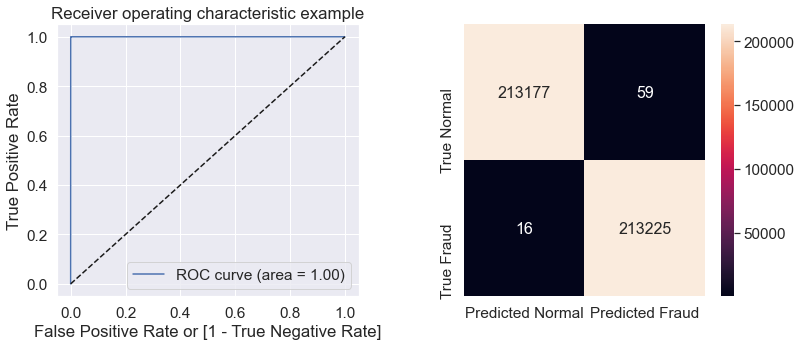

AUC_ROC: 1.0
F1 score :  1.0
Precision :  1.0
Recall :  1.0
Optimal threshold is 0.869


In [119]:
#Roc for train data
xgbc_threshold_adasyn = roc_confusion_matrix2(result_df_bal,y_train_adasyn,y_train_pred_proba_xgbc,flagtrain=True,model='XGBoost_Adasyn')

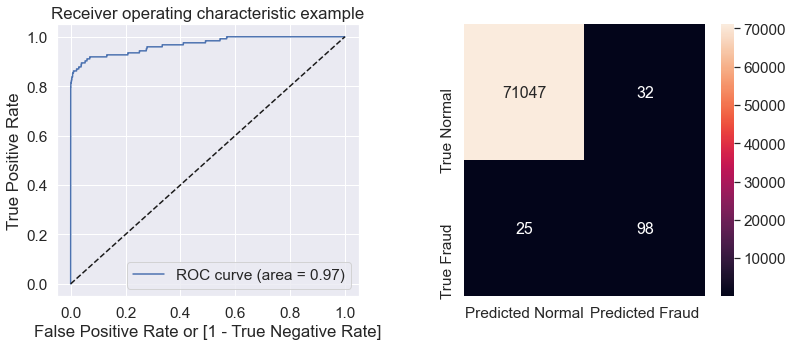

AUC_ROC: 0.969
F1 score :  0.775
Precision :  0.754
Recall :  0.797
Optimal threshold is 0.869


In [120]:
#ROC test data
result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,y_test_pred_proba_xgbc,flagtrain=False,opt_threshold = xgbc_threshold_adasyn,model='XGBoost_Adasyn')

#### 4.Random Forest 

In [121]:
# Tune Hyperpaprameter
rfc_tuned_adasyn = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

params = {
    'max_depth': [5,6,7],
    'n_estimators':range(70,100,5) 
         }


rfc_cv_adasyn = RandomizedSearchCV(estimator=rfc_tuned_adasyn, param_distributions=params, scoring='roc_auc',
                            cv=folds.split(X_train_adasyn,y_train_adasyn),n_jobs=-1,verbose=3)
# Fit the grid search to the data
rfc_cv_adasyn.fit(X_train_adasyn,y_train_adasyn) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000185FBBFF660>,
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'n_estimators': range(70, 100, 5)},
                   scoring='roc_auc', verbose=3)

In [122]:
# Best hyperparameters
print(rfc_cv_adasyn.best_score_)
print(rfc_cv_adasyn.best_params_)

# assign best estimators
rfc_tuned_adasyn.set_params(**rfc_cv_adasyn.best_estimator_.get_params())

# Fit rfc with best hyperparameters
rfc_tuned_adasyn.fit(X_train_adasyn,y_train_adasyn)

0.9963407071926131
{'n_estimators': 75, 'max_depth': 7}


RandomForestClassifier(max_depth=7, n_estimators=75, random_state=42)

In [123]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_rfc = rfc_tuned_adasyn.predict_proba(X_train_adasyn)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_rfc = rfc_tuned_adasyn.predict_proba(X_test_pwtr.values)[:,1]

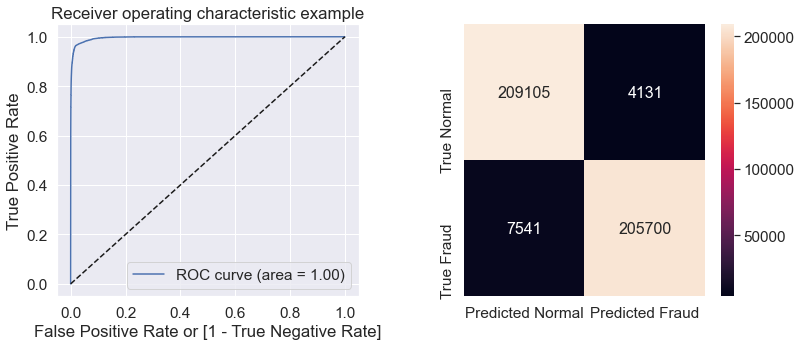

AUC_ROC: 0.996
F1 score :  0.972
Precision :  0.98
Recall :  0.965
Optimal threshold is 0.525


In [124]:
#Roc for train data
rfc_threshold_adasyn = roc_confusion_matrix2(result_df_bal,y_train_adasyn,y_train_pred_proba_rfc,flagtrain=True,model='RandomForest_Adasyn')

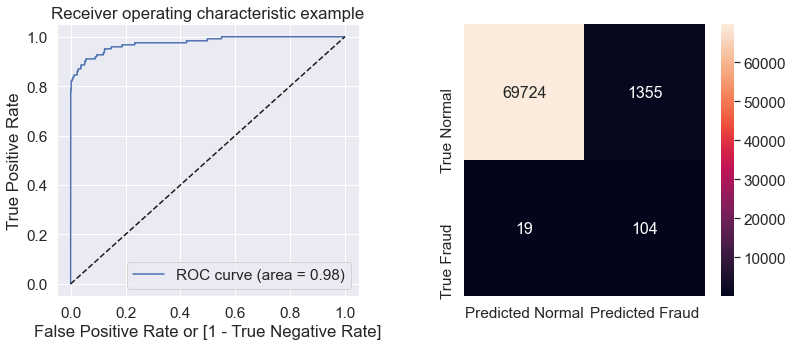

AUC_ROC: 0.976
F1 score :  0.131
Precision :  0.071
Recall :  0.846
Optimal threshold is 0.525


In [125]:
#ROC test data
result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,y_test_pred_proba_rfc,flagtrain=False,opt_threshold = rfc_threshold_adasyn,model='RandomForest_Adasyn')

In [127]:
#Evaluation metrics after balacing using Adasyn
result_df_bal

Model  AUC_ROC     F1  Recall  Precision  Threshold
0    LogisticReg_Smote    0.972  0.081   0.878      0.042      0.415
1   DecisionTree_Smote    0.932  0.173   0.854      0.097      0.520
2        XGBoost_Smote    0.969  0.832   0.764      0.913      0.931
3   RandomForest_Smote    0.977  0.229   0.846      0.132      0.352
4   LogisticReg_Adasyn    0.972  0.028   0.927      0.014      0.400
5  DecisionTree_Adasyn    0.926  0.082   0.837      0.043      0.520
6       XGBoost_Adasyn    0.969  0.775   0.797      0.754      0.869
7  RandomForest_Adasyn    0.976  0.131   0.846      0.071      0.525

#### From above summary , we can observe XGBoost on Adasyn balanced classes has good AUC_ROC , F1 and precision scores

### OverSampling using Random Oversampler

In this process new datapoints are generated by randomly duplicating examples in the minority class.

In [128]:
#Balancing using RandomOversampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pwtr, y_train)

In [129]:
#check
X_train_ros.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.410410 -0.147528 -0.841174  0.396367 -0.124241 -1.010984  0.170590   
1 -0.677525 -0.339435 -1.142599 -0.390072  0.198429 -0.313779  2.963931   
2 -0.835692  0.761475  1.177396  0.076002 -0.005779 -0.560710  0.604764   
3  1.207858 -0.528473 -0.350417  0.394845 -0.657817 -0.118650 -0.567704   
4 -1.025098 -3.643983 -1.618210  0.532563 -2.213816  0.296549  1.280535   

         V8        V9       V10       V11       V12       V13       V14  \
0 -0.368933  0.780021 -0.042677 -0.813843  0.131942 -0.530559  0.441788   
1 -0.640268 -1.269840 -0.676379  0.379486  0.187639 -0.021491  1.047495   
2 -0.165182 -0.176322  0.256200  0.630391  1.124264  1.362390 -0.387572   
3  0.027697  0.966232  0.197215  0.740528  0.811786 -0.578376  0.040572   
4 -0.551575 -0.036066 -0.119871 -0.752716 -0.880632  0.077701  0.073038   

        V15       V16       V17       V18       V19       V20       V21  \
0  0.201919 -0.446304 -0.356143 -0.720688  0.225619 -0.344945 -0.334105   
1 -1.484327 -0.562105 -0.767834  0.230722  0.342322  1.243356  0.972659   
2  1.082005 -0.503703 -0.115408 -1.399937 -0.682783  0.274999 -0.332628   
3 -0.351535  0.431830 -0.725558  0.543699 -0.111794 -0.146964  0.405944   
4  1.024194  2.353337  0.017277 -0.961335 -0.151533  5.381592  1.631087   

        V22       V23       V24       V25       V26       V27       V28  \
0 -0.864704  0.464383 -0.099398 -0.306384 -1.306578 -0.064078 -0.138665   
1  1.825313  1.148596 -0.634403  0.259975  1.657002 -0.273591  0.632868   
2 -0.340779  0.261243  1.074809 -0.503019  0.111638 -0.379645 -1.129693   
3  1.203656  0.137610  0.023011 -0.644226  1.204633 -0.120571 -0.143325   
4 -1.419809 -2.120378  1.433526 -2.221633 -1.559876 -0.941893  0.978258   

     Amount  
0 -0.126381  
1  1.766553  
2 -0.326470  
3  0.691379  
4  2.483170

#### 1. Decision Tree 

In [130]:
#hyperparameter tuning decision tree
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
# Create the parameter grid 
params = {
    'max_depth': range(5, 11, 2),
    'min_samples_leaf': range(50, 80, 10),
    'min_samples_split': range(50, 80, 10)
}
# Instantiate the grid search model
dt_tuned_ros = DecisionTreeClassifier(random_state=42,criterion='entropy')
dt_cv_ros = GridSearchCV(estimator = dt_tuned_ros, param_grid = params, 
                          cv = folds.split(X_train_ros,y_train_ros), scoring  = 'roc_auc',verbose=1,n_jobs=-1)

# Fit the grid search to the data
dt_cv_ros.fit(X_train_ros,y_train_ros) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000185ED530350>,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 11, 2),
                         'min_samples_leaf': range(50, 80, 10),
                         'min_samples_split': range(50, 80, 10)},
             scoring='roc_auc', verbose=1)

In [131]:
# Best hyperparameters
print(dt_cv_ros.best_score_)
print(dt_cv_ros.best_params_)

0.9996101833099855
{'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [132]:
# assign best estimators
dt_tuned_ros.set_params(**dt_cv_ros.best_estimator_.get_params())
# Fit dt with best hyperparameters
dt_tuned_ros.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

In [133]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_dt = dt_tuned_ros.predict_proba(X_train_ros)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_dt = dt_tuned_ros.predict_proba(X_test_pwtr)[:,1]


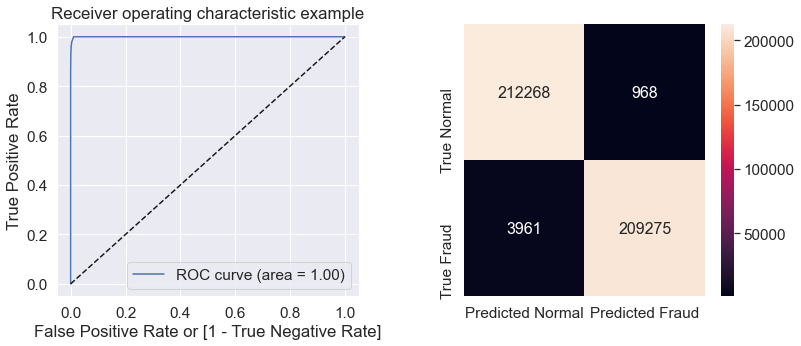

AUC_ROC: 1.0
F1 score :  0.988
Precision :  0.995
Recall :  0.981
Optimal threshold is 0.753


In [134]:
#Roc for train data
dt_threshold_ros = roc_confusion_matrix2(result_df_bal,y_train_ros,y_train_pred_proba_dt,flagtrain=True,model='DecisionTree_ROS')

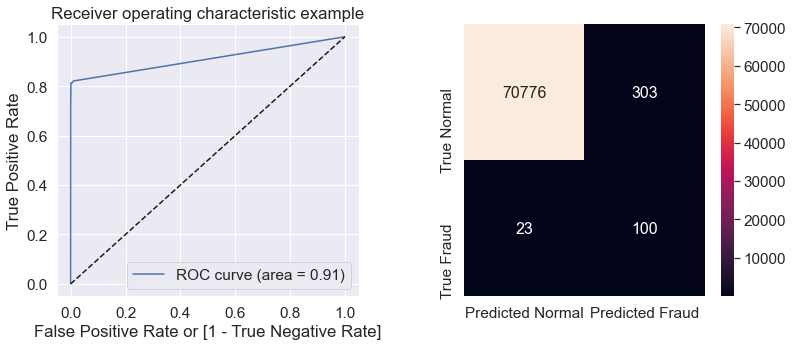

AUC_ROC: 0.909
F1 score :  0.38
Precision :  0.248
Recall :  0.813
Optimal threshold is 0.753


In [135]:
#ROC test data
result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,y_test_pred_proba_dt,flagtrain=False,opt_threshold = dt_threshold_ros,model='DecisionTree_ROS')

#### 2. XGBoost

In [136]:
#hyperparamter
xgbc_tuned_ros = XGBClassifier(random_state=42, n_jobs=-1,seed=42,gamma=0.9,reg_alpha=0.1,tree_method='hist')
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

param_comb = 15
#perform cross validation 
params = { 
        'n_estimators':range(130,150),
        'max_depth': [3, 4, 5],
        'min_child_weight':range(1,6,2),
        'colsample_bytree': [0.6, 0.8, 1.0],
        'learning_rate':list(np.arange(0.05,0.5,0.02))
          }


xgbc_cv_ros = RandomizedSearchCV(xgbc_tuned_ros, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=folds.split(X_train_ros,y_train_ros), verbose=3, random_state=42)


xgbc_cv_ros.fit(X_train_ros,y_train_ros)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[19:03:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000185ED09FD60>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=0.9,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, miss...
                                                          0.25000000000000006,
                                                          0.27,
                                                          0.29000000000000004,
                                           

In [137]:
# Best hyperparameters
print(xgbc_cv_ros.best_score_)
print(xgbc_cv_ros.best_params_)

0.9999932722541851
{'n_estimators': 144, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.21000000000000002, 'colsample_bytree': 0.8}


In [138]:
# assign best estimators
xgbc_tuned_ros.set_params(**xgbc_cv_ros.best_estimator_.get_params())

# Fit xgvc with best hyperparameters
xgbc_tuned_ros.fit(X_train_ros,y_train_ros)


[19:03:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.21000000000000002, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=144, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='hist', validate_parameters=1,
              verbosity=None)

In [139]:
# predict fraud on train data based on best estimators and values
y_train_pred_proba_xgbc = xgbc_tuned_ros.predict_proba(X_train_ros)[:,1]

# predict fraud on test data based on best estimators and values
y_test_pred_proba_xgbc = xgbc_tuned_ros.predict_proba(X_test_pwtr.values)[:,1]

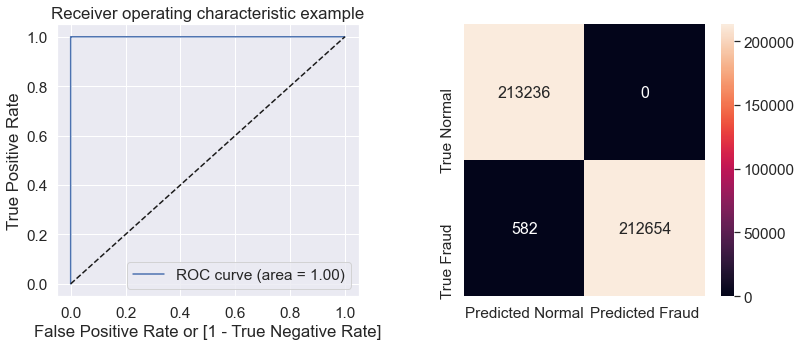

AUC_ROC: 1.0
F1 score :  0.999
Precision :  1.0
Recall :  0.997
Optimal threshold is 0.998


In [140]:
#Roc for train data
xgbc_threshold_ros = roc_confusion_matrix2(result_df_bal,y_train_ros,y_train_pred_proba_xgbc,flagtrain=True,model='XGBoost_ROS')


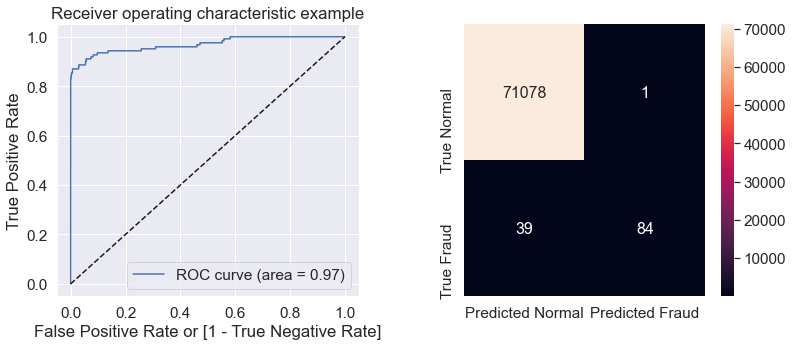

AUC_ROC: 0.969
F1 score :  0.808
Precision :  0.988
Recall :  0.683
Optimal threshold is 0.998


In [141]:
#ROC test data
result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,y_test_pred_proba_xgbc,flagtrain=False,opt_threshold = xgbc_threshold_ros,model='XGBoost_ROS')

#### 3. Random forest 

In [142]:
# Tune Hyperpaprameter
rfc_tuned_ros = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

params = {
    'max_depth': [6,7],
    'n_estimators':range(80,100,5) 
         }


rfc_cv_ros = RandomizedSearchCV(estimator=rfc_tuned_ros, param_distributions=params, scoring='roc_auc',
                            cv=folds.split(X_train_ros,y_train_ros),n_jobs=-1,verbose=3)
# Fit the grid search to the data
rfc_cv_ros.fit(X_train_ros,y_train_ros) 


Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000018586173B30>,
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [6, 7],
                                        'n_estimators': range(80, 100, 5)},
                   scoring='roc_auc', verbose=3)

In [143]:
# Best hyperparameters
print(rfc_cv_ros.best_score_)
print(rfc_cv_ros.best_params_)

0.9992142994493729
{'n_estimators': 85, 'max_depth': 7}


In [144]:
# assign best estimators
rfc_tuned_ros.set_params(**rfc_cv_ros.best_estimator_.get_params())

# Fit rfc with best hyperparameters
rfc_tuned_ros.fit(X_train_ros,y_train_ros)

RandomForestClassifier(max_depth=7, n_estimators=85, random_state=42)

In [145]:
# predict fraud on train data based on best estimators and values
#y_train_pred_rfc = rfc_tuned_ros.predict(X_train_ros)
y_train_pred_proba_rfc = rfc_tuned_ros.predict_proba(X_train_ros)[:,1]

# predict fraud on test data based on best estimators and values
#y_test_pred_rfc = rfc_tuned_ros.predict(X_test_pwtr.values)
y_test_pred_proba_rfc = rfc_tuned_ros.predict_proba(X_test_pwtr.values)[:,1]

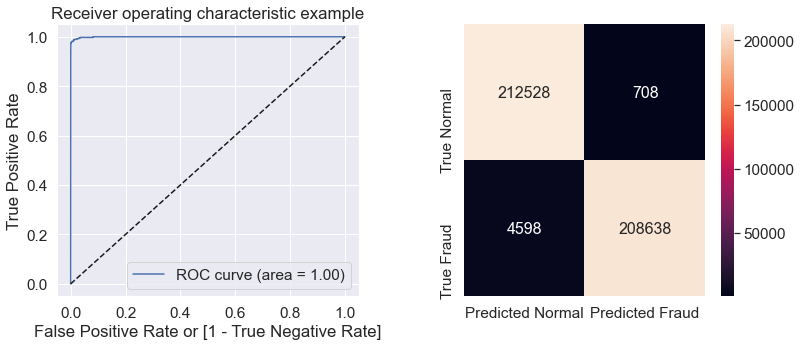

AUC_ROC: 0.999
F1 score :  0.987
Precision :  0.997
Recall :  0.978
Optimal threshold is 0.375


In [146]:
#Roc for train data
rfc_threshold_ros = roc_confusion_matrix2(result_df_bal,y_train_ros,y_train_pred_proba_rfc,flagtrain=True,model='RandomForest_ROS')

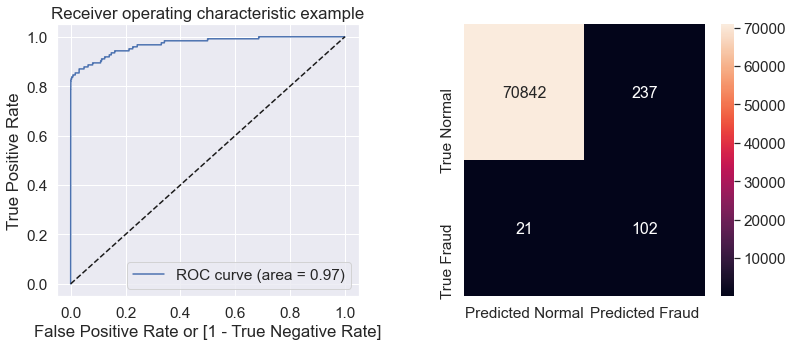

AUC_ROC: 0.97
F1 score :  0.442
Precision :  0.301
Recall :  0.829
Optimal threshold is 0.375


In [147]:
#ROC test data
result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,y_test_pred_proba_rfc,flagtrain=False,opt_threshold = rfc_threshold_ros,model='RandomForest_ROS')

In [148]:
#Evalution metrics for model after smote , adasyn and random oversampling
result_df_bal

Model  AUC_ROC     F1  Recall  Precision  Threshold
0     LogisticReg_Smote    0.972  0.081   0.878      0.042      0.415
1    DecisionTree_Smote    0.932  0.173   0.854      0.097      0.520
2         XGBoost_Smote    0.969  0.832   0.764      0.913      0.931
3    RandomForest_Smote    0.977  0.229   0.846      0.132      0.352
4    LogisticReg_Adasyn    0.972  0.028   0.927      0.014      0.400
5   DecisionTree_Adasyn    0.926  0.082   0.837      0.043      0.520
6        XGBoost_Adasyn    0.969  0.775   0.797      0.754      0.869
7   RandomForest_Adasyn    0.976  0.131   0.846      0.071      0.525
8      DecisionTree_ROS    0.909  0.380   0.813      0.248      0.753
9           XGBoost_ROS    0.969  0.808   0.683      0.988      0.998
10     RandomForest_ROS    0.970  0.442   0.829      0.301      0.375

#### We observe that XGBoost model  using Random OverSampling has  good ROC_AUC , F1 and precision scores

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

[19:50:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


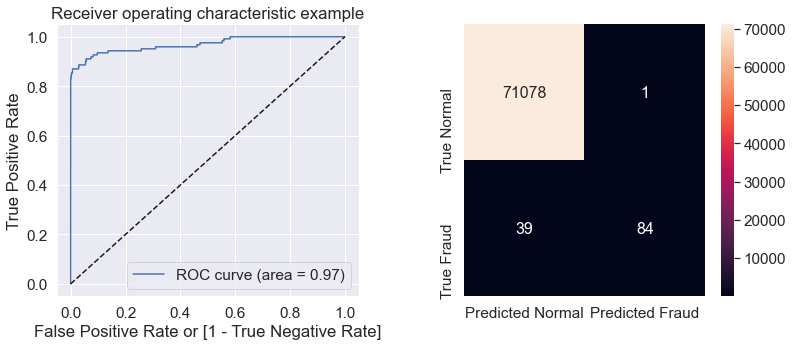

AUC_ROC: 0.969
F1 score :  0.808
Precision :  0.988
Recall :  0.683
Optimal threshold is 0.998


In [149]:
# perform the best oversampling method XGBoost Using Random OverSampling on X_train & y_train

clf_threshold = xgbc_threshold_ros
clf = XGBClassifier(random_state=42, n_jobs=-1,seed=42,gamma=0.9,reg_alpha=0.1,tree_method='hist')
clf.set_params(**xgbc_cv_ros.best_estimator_.get_params())
clf.fit(X_train_ros,y_train_ros)

clf_y_test_pred = clf.predict(X_test_pwtr)
clf_y_test_pred_prob = clf.predict_proba(X_test_pwtr)[:,1] 

#ROC test data
result_df_bal = roc_confusion_matrix2(result_df_bal,y_test,clf_y_test_pred_prob,flagtrain=False,opt_threshold = clf_threshold,model='XGBoost_Smote_Best')

#### Print the important features of the best model to understand the dataset

Top var = 10
2nd Top var = 14
3rd Top var = 4


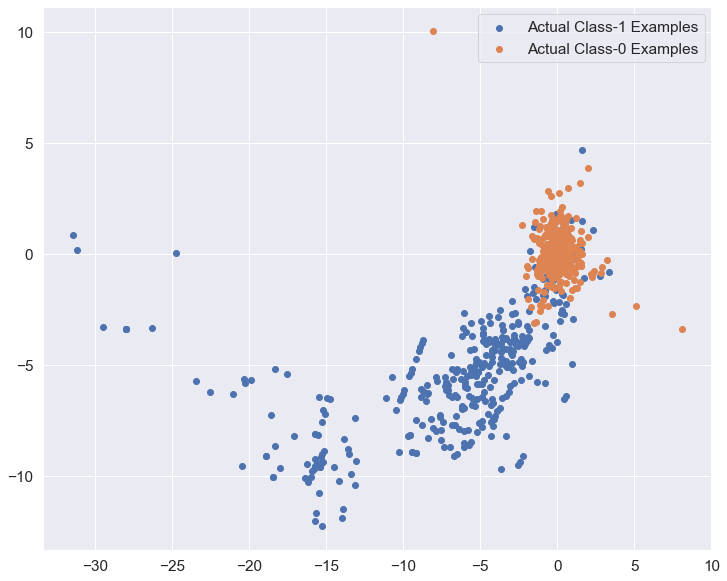

In [151]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()


### Conclusion

Metrics considered for model evaluation are **ROC_AUC, F1 and Precision score**.

From the Amount feature, we observe that data set might be from local bank. For banks with a smaller average transaction value, we want a high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can verify about the transaction by calling the customer. Also the difference between precision & recall must not be very big,hence F1 score is used.


Looking at above results **XGBOOST model with Random OverSampling**  has provided good results on test dataset. 

**XGBoost ROC_AUC : 0.969**

**XGBoost F1 Score: 0.808**

**XGBoost precision score: 0.988**

**XGBoost threshold: 0.998**

We also observed XGBoost without OverSampling has provided good results.